In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [155]:
dataset_path = 'dataset.csv'
data = pd.read_csv(dataset_path)
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

<h1>Understanding The Data</h1>
<ul>

<li>popularity: (0-100) based on most recent, most played tracks</li>
<li>explicit: (T/F) contains explicit lyrics</li>
<li>danceability: (0.0-1.0) based on tempo, rhythm stability, beat strength</li>
<li>energy: (0.0-1.0) based on fast,loud,and noise</li>
<li>key: 0=C, 1=C#/Db, 2=D</li>
<li>mode: major = 1, minor = 0</li>
<li>speechiness: (0.0-1.0), < 0.33 non-speech like</li>
<li>acousticness: (0.0-1.0)</li>
<li>instructmentalness: (0.0-1.0) 1.0= instrucmental, "Ooh" and "ahh" are treated as instrumental</li>
<li>liveness: Listen for audience, >0.8 is likely live</li>
<li>valence: (0.0-1.0) high=happy, cheerful, euphoric. low = sad, depressed, angry</li>
<li>tempo: BPM</li>

</ul>

<h1> Cleaning Data</h1>

In [156]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [157]:
data[data["artists"].isnull()]

Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]

In [158]:
data.drop([65900], inplace=True)
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [159]:
data["artists"].value_counts()

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

In [160]:
data["track_genre"].value_counts()

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64

<h1> Most Popular Song Genre</h1>
<ul>
<li>I want to check what genre is the most popular in the library, so I grouped the tracks by track_genre and sort them by the popularity score

In [161]:
data_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).head(12)
data_popularity

track_genre
pop-film             59.283000
k-pop                56.952953
chill                53.651000
sad                  52.379000
grunge               49.594000
indian               49.539000
anime                48.772000
emo                  48.128000
sertanejo            47.866000
pop                  47.576000
progressive-house    46.615000
piano                45.273000
Name: popularity, dtype: float64

The top 12 most popular genre above came out unexpected. My suspicion was that some tracks in some genre have outliers being the very popular, thus, increasing the popularity score of the genre by a significant amount. Therefore, I excluded tracks that are above 99th percentile, which turns out to be a popularity score of 80 or below, and there are 954 tracks with a popularity score above 80

In [162]:
np.quantile(data['popularity'], 0.99)

80.0

In [163]:
(data['popularity'] > 80).value_counts()

popularity
False    113045
True        954
Name: count, dtype: int64

In [164]:
data = data[data['popularity'] < 80]
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
5                5  01MVOl9KtVTNfFiBU9I7dc            Tyrone Wells   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
5                                    Days I Will Remember   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
5             Days I Will Remember          58       214240     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
5              0.688  0.4810  ...    -8.807     1       0.1050        0.2890   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
5               0.000000    0.1890   0.6660   98.017               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

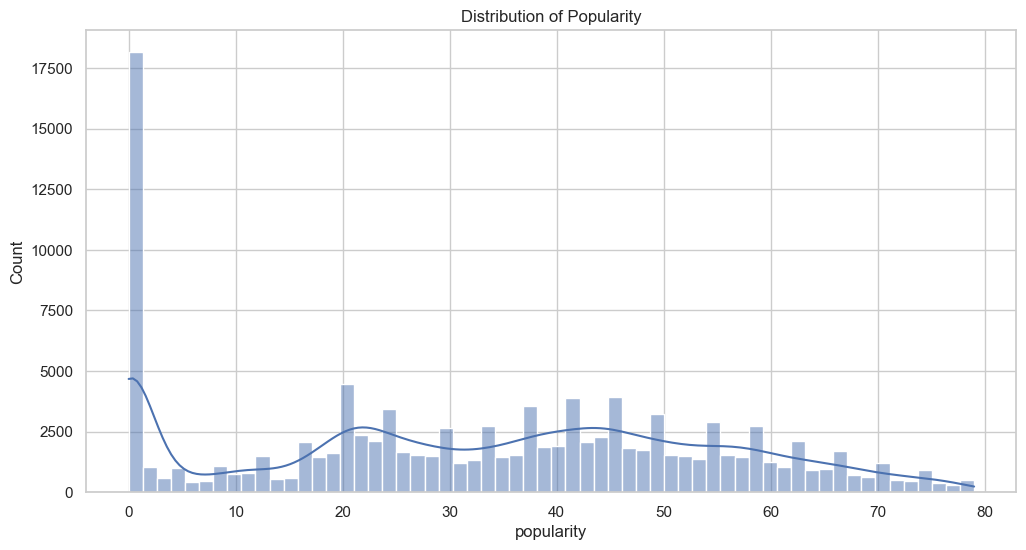

In [165]:
# Distribution of popularity
plt.figure(figsize=(12,6))
sns.histplot(data['popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.show()

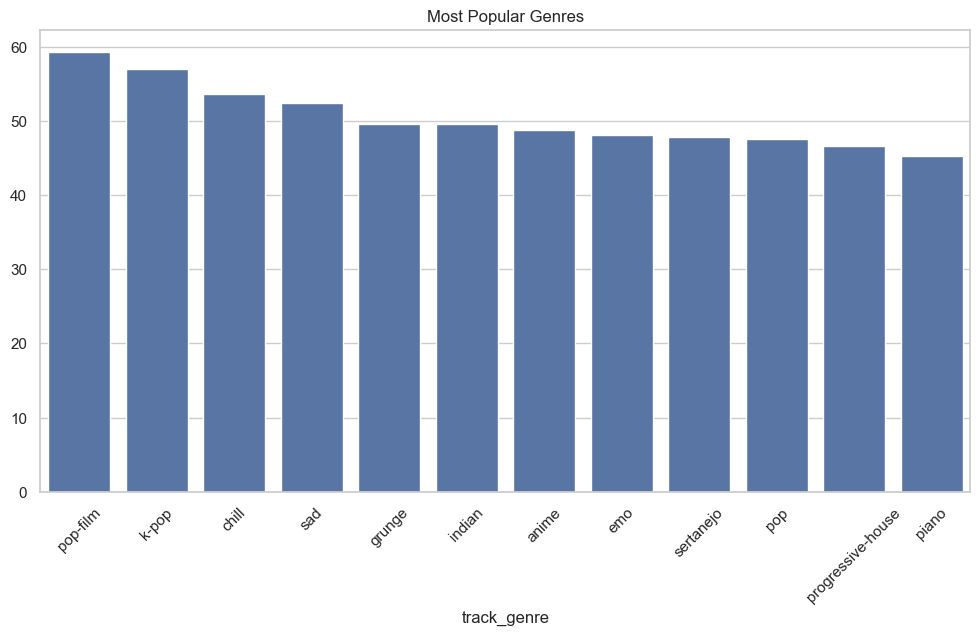

In [166]:
# Most popular genres
plt.figure(figsize=(12,6))
sns.barplot(x = data_popularity.index, y = data_popularity.values)
plt.title('Most Popular Genres')
plt.xticks(rotation=45)
plt.show()

In [167]:
# Drop data to top 12 genres
data = data[data['track_genre'].isin(data_popularity.index)]
data

Unnamed: 0                track_id                     artists  \
5000         5000  1gUAX2ImxDsB3YDcyxMXlB                          美波   
5001         5001  1di1C0QI6Y92yZPYn6XYAZ                   KANA-BOON   
5003         5003  1rN9QoVxw5U7TJkyaUR8C1  TK from Ling tosite sigure   
5004         5004  23phSRwoMy48rwFpmuAP8q              Yoko Takahashi   
5005         5005  6y4GYuZszeXNOXuBFsJlos                         Eve   
...           ...                     ...                         ...   
97995       97995  6L7edR8ePoAiOEthSAfeBD               Gerson Rufino   
97996       97996  0t9X7I69027UILQB4WYCai          Chico Rey & Paraná   
97997       97997  6nYIAevQfh7QhuQYXYLy50               Léo & Raphael   
97998       97998  7ALQOUgUrUifvmcGMCyvld                 Os Serranos   
97999       97999  23iyR47eBWtYZPWReCbAfy         João Paulo & Daniel   

                                             album_name  \
5000                                            カワキヲアメク   
5001                                               TIME   
5003                                    Fantastic Magic   
5004                                   残酷な天使のテーゼ/魂のルフラン   
5005                         Kaikai Kitan / Ao No Waltz   
...                                                 ...   
97995                                      Reconstrução   
97996                         Sucessos de Ouro, Vol. 15   
97997                           Na Contramão do Sucesso   
97998  Os Serranos Interpretam Sucessos Gaúchos, Vol. 3   
97999                                          Volume 8   

                    track_name  popularity  duration_ms  explicit  \
5000                   カワキヲアメク          71       251933     False   
5001                     シルエット          73       240133     False   
5003                   unravel          73       238360     False   
5004                 残酷な天使のテーゼ          60       247746     False   
5005              Kaikai Kitan          75       221426     False   
...                        ...         ...          ...       ...   
97995             Reconstrução          46       262143     False   
97996           Velha Porteira          43       224600     False   
97997    Aqui É Parana Cunhado          44       153426     False   
97998  O Casamento de Doralice          44       250600     False   
97999     Preciso te encontrar          43       201946     False   

       danceability  energy  ...  loudness  mode  speechiness  acousticness  \
5000          0.541   0.846  ...    -2.729     0       0.0551       0.01220   
5001          0.436   0.934  ...    -2.685     1       0.0507       0.00001   
5003          0.508   0.889  ...    -2.755     0       0.0862       0.04950   
5004          0.691   0.773  ...    -5.244     0       0.0494       0.01740   
5005          0.584   0.911  ...    -3.515     0       0.0900       0.01190   
...             ...     ...  ...       ...   ...          ...           ...   
97995         0.769   0.718  ...    -5.809     1       0.0241       0.23400   
97996         0.529   0.564  ...    -4.713     1       0.0247       0.66800   
97997         0.690   0.926  ...    -5.584     0       0.1830       0.33600   
97998         0.763   0.769  ...    -6.245     1       0.0292       0.23500   
97999         0.771   0.722  ...    -8.718     1       0.0327       0.13800   

       instrumentalness  liveness  valence    tempo  time_signature  \
5000           0.000149    0.1630    0.524  129.138               4   
5001           0.140000    0.3210    0.384   91.481               4   
5003           0.000000    0.0984    0.332  135.014               4   
5004           0.000451    0.1170    0.502  128.162               4   
5005           0.000000    0.1190    0.606   92.502               4   
...                 ...       ...      ...      ...             ...   
97995          0.000000    0.1680    0.725  105.015               4   
97996          0.000000    0.1960    0.594  160.445               3   
9799

<h1> Independant Vs Dependant</h1>

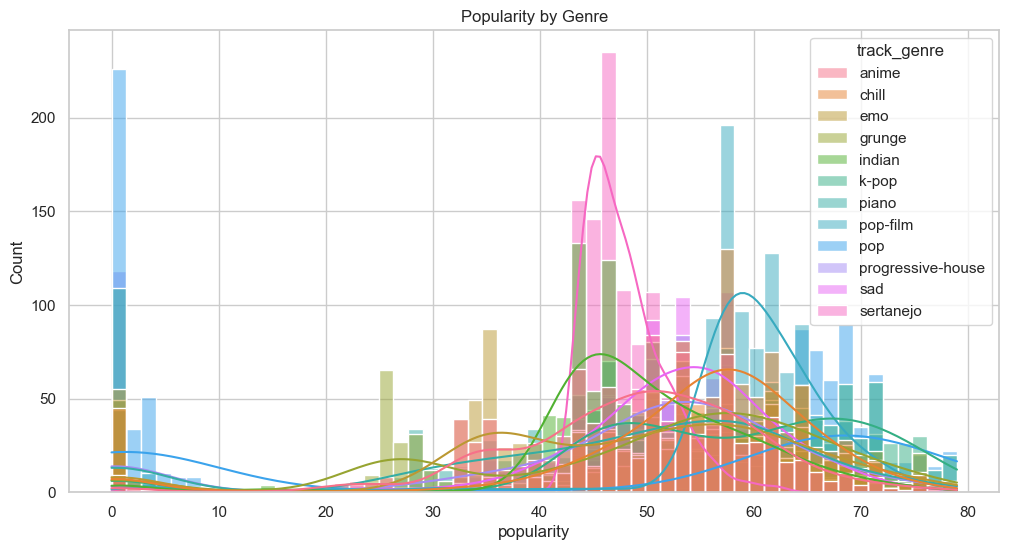

PearsonRResult(statistic=-0.008556248412592036, pvalue=0.35284282378671633)


C:\Users\kylem\AppData\Local\Temp\ipykernel_27168\602938353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['track_genre'] = pd.Categorical(data['track_genre'])
C:\Users\kylem\AppData\Local\Temp\ipykernel_27168\602938353.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['track_genre'] = data['track_genre'].cat.codes
C:\Users\kylem\AppData\Local\Temp\ipykernel_27168\602938353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [168]:
# Distribution of popularity by genre
plt.figure(figsize=(12,6))
sns.histplot(data, x='popularity', hue='track_genre', kde=True)
plt.title('Popularity by Genre')
plt.show()
# Correlation between popularity and track_genre
data['track_genre'] = pd.Categorical(data['track_genre'])
data['track_genre'] = data['track_genre'].cat.codes
data['track_genre'] = data['track_genre'].astype('category')
data['track_genre']

corr= pearsonr(data['track_genre'], data['popularity'])
print(corr)

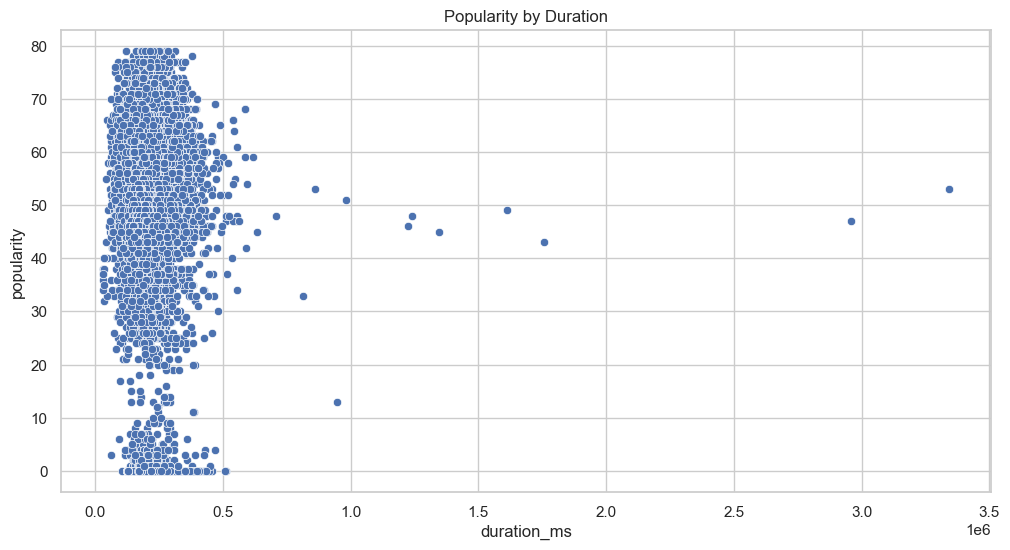

PearsonRResult(statistic=0.005498890577077307, pvalue=0.550443003355813)


In [169]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='duration_ms', y='popularity', data=data)
plt.title('Popularity by Duration')
plt.show()
corr = pearsonr(data['duration_ms'], data['popularity'])
print(corr)

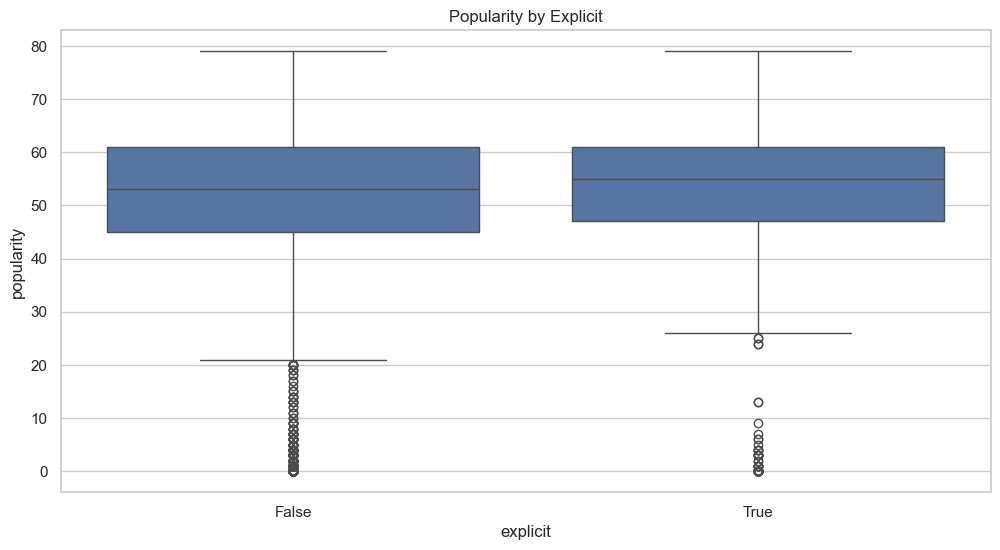

PearsonRResult(statistic=0.023633517794958758, pvalue=0.010270634663018943)


In [187]:
plt.figure(figsize=(12,6))
sns.boxplot(x='explicit', y='popularity', data=data)
plt.title('Popularity by Explicit')
plt.show()
corr = pearsonr(data['explicit'], data['popularity'])
print(corr)

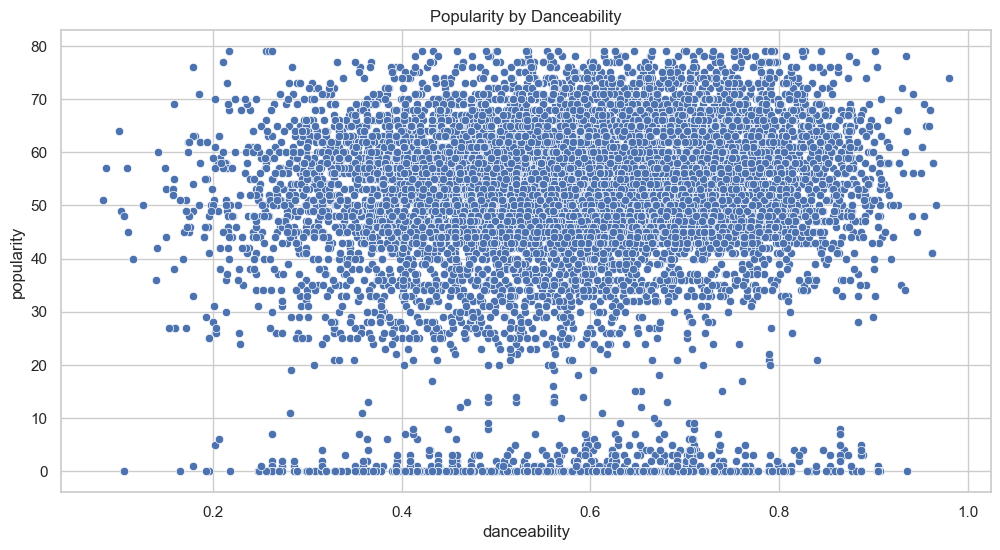

PearsonRResult(statistic=0.06957912386558984, pvalue=3.898009389093907e-14)


In [188]:
# Popularity vs Danceability
plt.figure(figsize=(12,6))
sns.scatterplot(x='danceability', y='popularity', data=data)
plt.title('Popularity by Danceability')
plt.show()
corr = pearsonr(data['danceability'], data['popularity'])
print(corr)

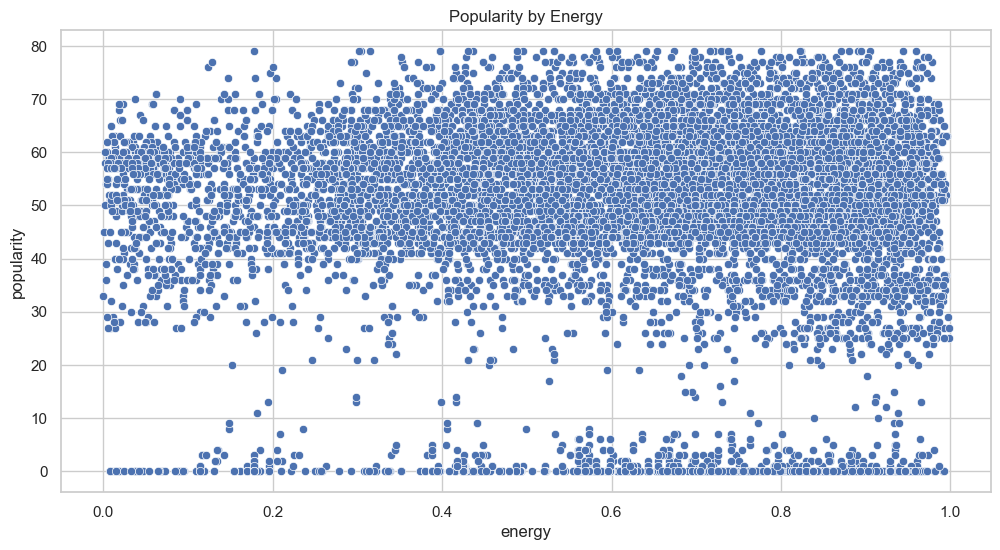

PearsonRResult(statistic=-0.023068858567469222, pvalue=0.01223669839292133)


In [189]:
# Popularity vs Energy
plt.figure(figsize=(12,6))
sns.scatterplot(x='energy', y='popularity', data=data)
plt.title('Popularity by Energy')
plt.show()
corr = pearsonr(data['energy'], data['popularity'])
print(corr)

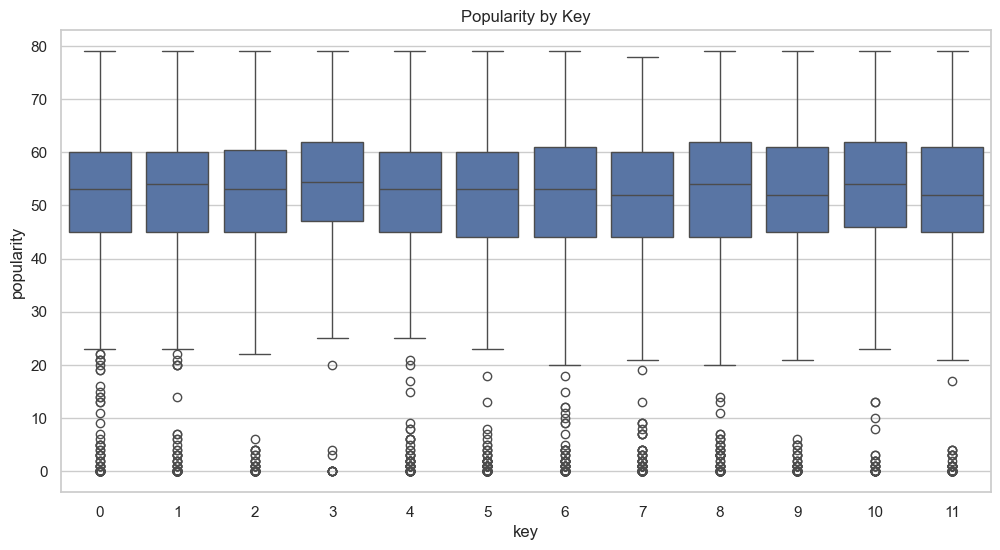

PearsonRResult(statistic=-0.007217312165868271, pvalue=0.4332189051492278)


In [190]:
# Popularity vs key
plt.figure(figsize=(12,6))
sns.boxplot(x='key', y='popularity', data=data)
plt.title('Popularity by Key')
plt.show()
corr = pearsonr(data['key'], data['popularity'])
print(corr)

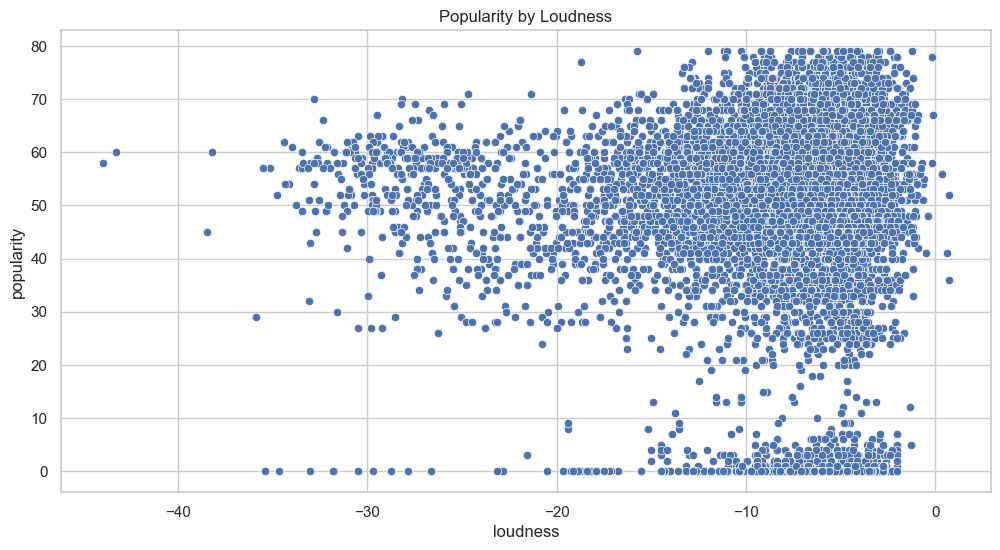

PearsonRResult(statistic=-0.00407196809032649, pvalue=0.6583787137923296)


In [191]:
# Popularity vs loudness
plt.figure(figsize=(12,6))
sns.scatterplot(x='loudness', y='popularity', data=data)
plt.title('Popularity by Loudness')
plt.show()
corr = pearsonr(data['loudness'], data['popularity'])
print(corr)

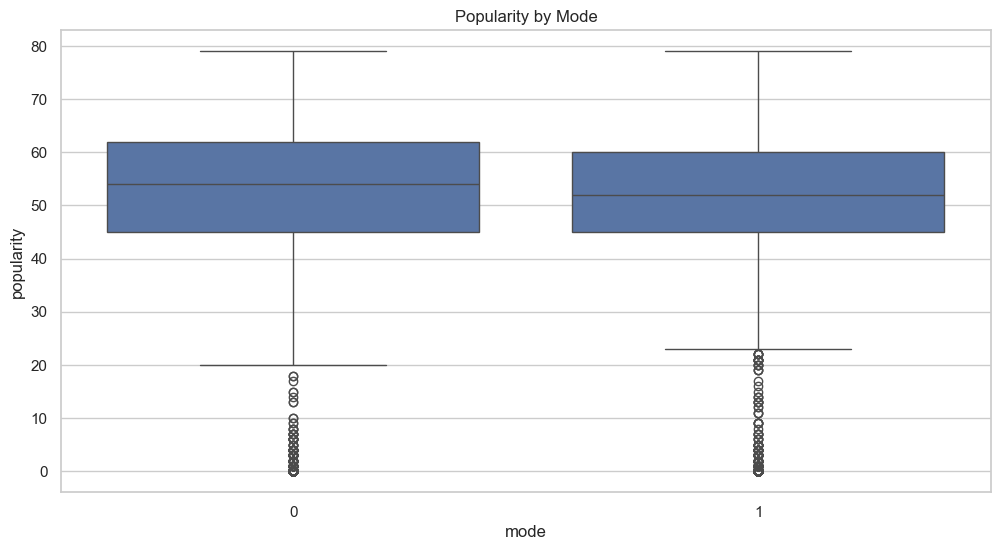

PearsonRResult(statistic=-0.032911977708486376, pvalue=0.0003506500857281193)


In [192]:
# popularity vs mode
plt.figure(figsize=(12,6))
sns.boxplot(x='mode', y='popularity', data=data)
plt.title('Popularity by Mode')
plt.show()
corr = pearsonr(data['mode'], data['popularity'])
print(corr)

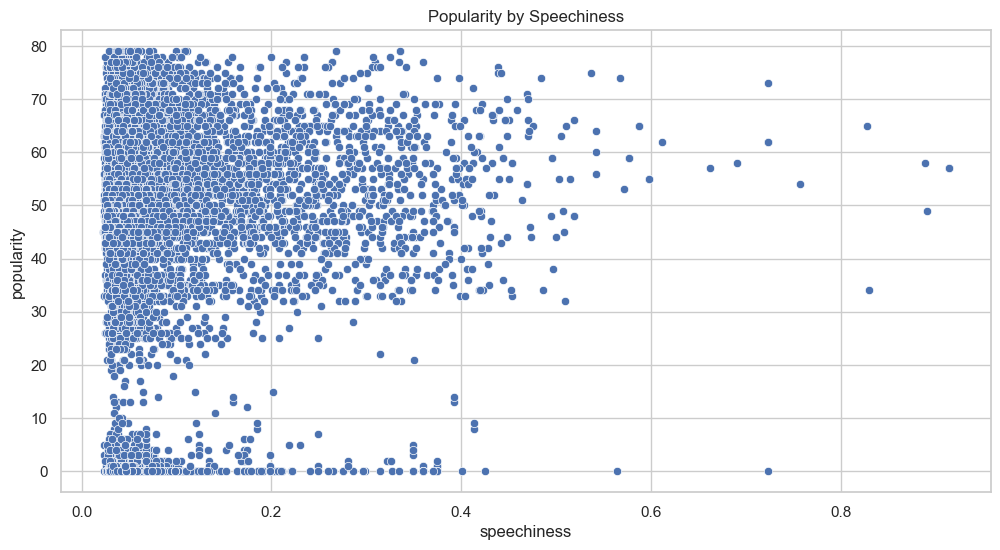

PearsonRResult(statistic=0.024391324901458806, pvalue=0.008075342052845132)


In [193]:
# popularity vs speechiness
plt.figure(figsize=(12,6))
sns.scatterplot(x='speechiness', y='popularity', data=data)
plt.title('Popularity by Speechiness')
plt.show()
corr = pearsonr(data['speechiness'], data['popularity'])
print(corr)

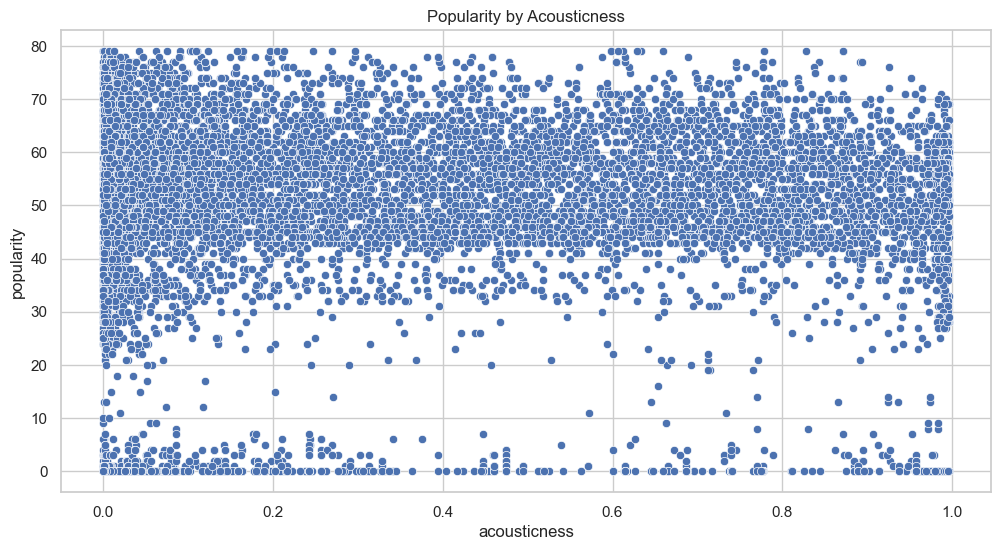

PearsonRResult(statistic=0.03013713544367878, pvalue=0.0010635368575045445)


In [194]:
# popularity vs acousticness
plt.figure(figsize=(12,6))
sns.scatterplot(x='acousticness', y='popularity', data=data)
plt.title('Popularity by Acousticness')
plt.show()
corr = pearsonr(data['acousticness'], data['popularity'])
print(corr)

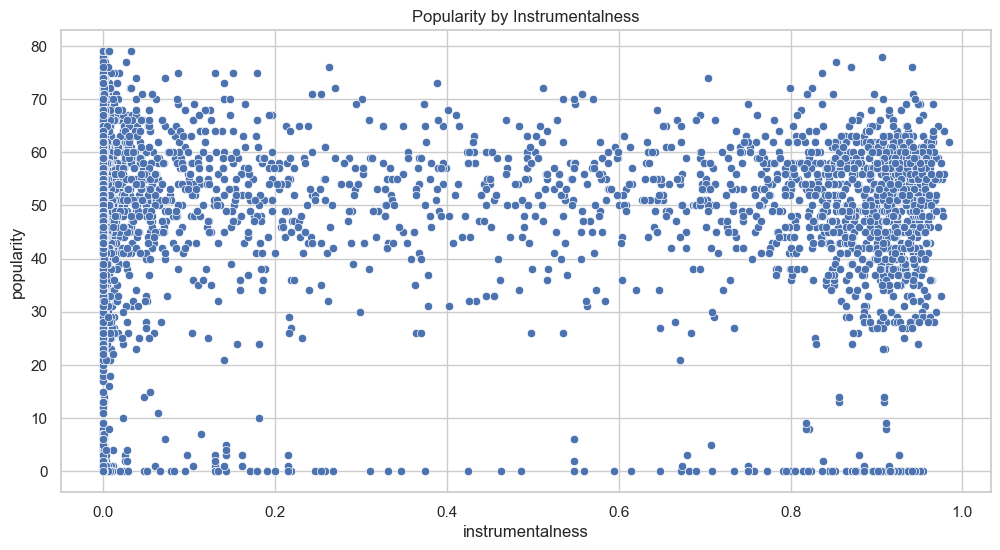

PearsonRResult(statistic=-0.052897988881982334, pvalue=9.035698082253365e-09)


In [195]:
# popularity vs instrumentalness
plt.figure(figsize=(12,6))
sns.scatterplot(x='instrumentalness', y='popularity', data=data)
plt.title('Popularity by Instrumentalness')
plt.show()
corr = pearsonr(data['instrumentalness'], data['popularity'])
print(corr)

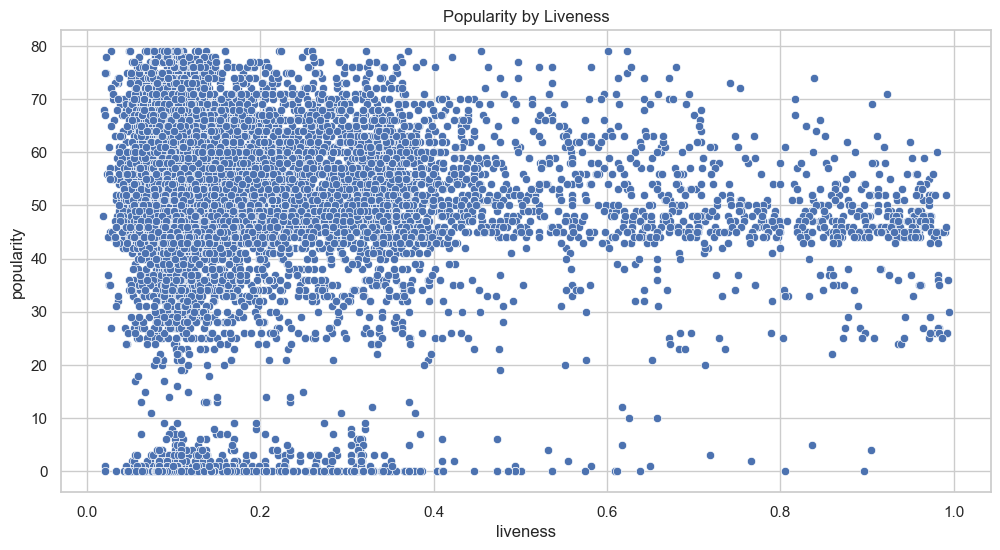

PearsonRResult(statistic=-0.04070951536542727, pvalue=9.768380169339977e-06)


In [196]:
# popularity vs liveness
plt.figure(figsize=(12,6))
sns.scatterplot(x='liveness', y='popularity', data=data)
plt.title('Popularity by Liveness')
plt.show()
corr = pearsonr(data['liveness'], data['popularity'])
print(corr)

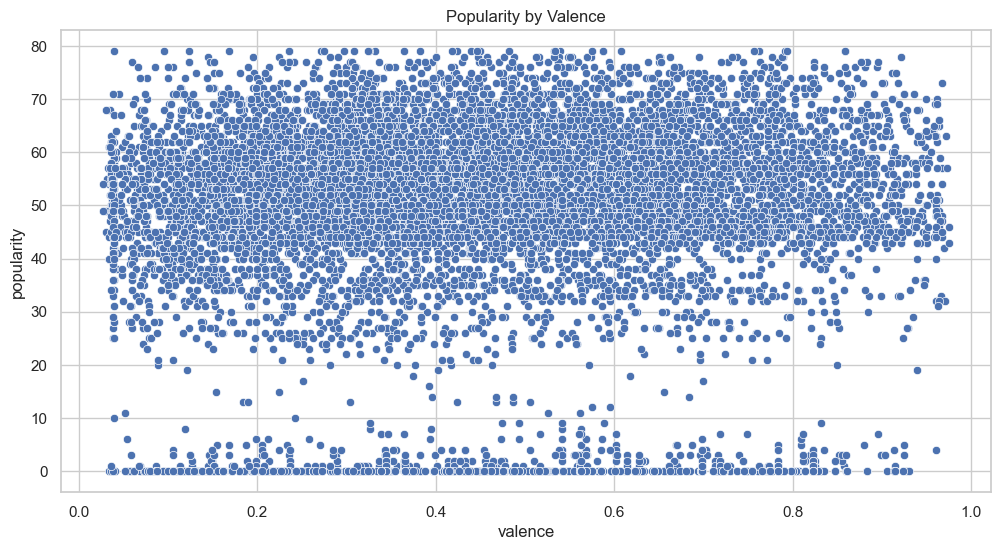

PearsonRResult(statistic=0.030495959037042213, pvalue=0.0009258334496593798)


In [197]:
# popularity vs valence
plt.figure(figsize=(12,6))
sns.scatterplot(x='valence', y='popularity', data=data)
plt.title('Popularity by Valence')
plt.show()
corr = pearsonr(data['valence'], data['popularity'])
print(corr)

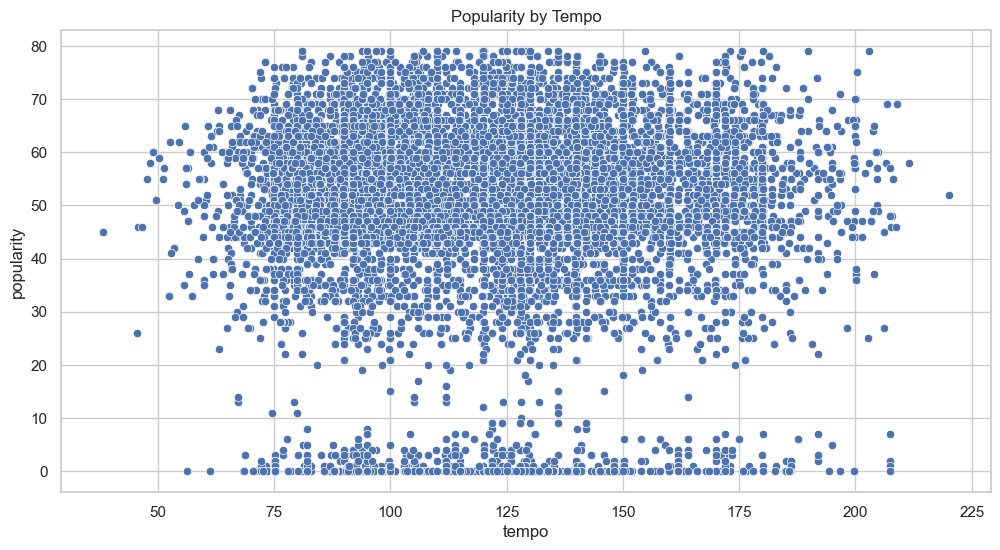

PearsonRResult(statistic=-0.03745865127620544, pvalue=4.7247642800107315e-05)


In [198]:
# popularity vs tempo
plt.figure(figsize=(12,6))
sns.scatterplot(x='tempo', y='popularity', data=data)
plt.title('Popularity by Tempo')
plt.show()
corr = pearsonr(data['tempo'], data['popularity'])
print(corr)

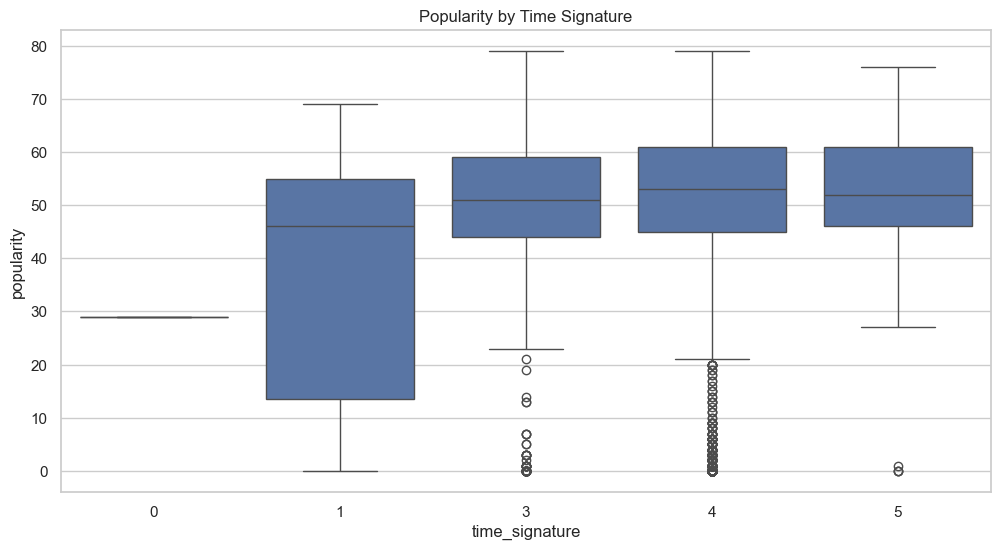

PearsonRResult(statistic=0.07047118270893649, pvalue=1.836682253695926e-14)


In [199]:
# popularity vs time_signature
plt.figure(figsize=(12,6))
sns.boxplot(x='time_signature', y='popularity', data=data)
plt.title('Popularity by Time Signature')
plt.show()
corr = pearsonr(data['time_signature'], data['popularity'])
print(corr)

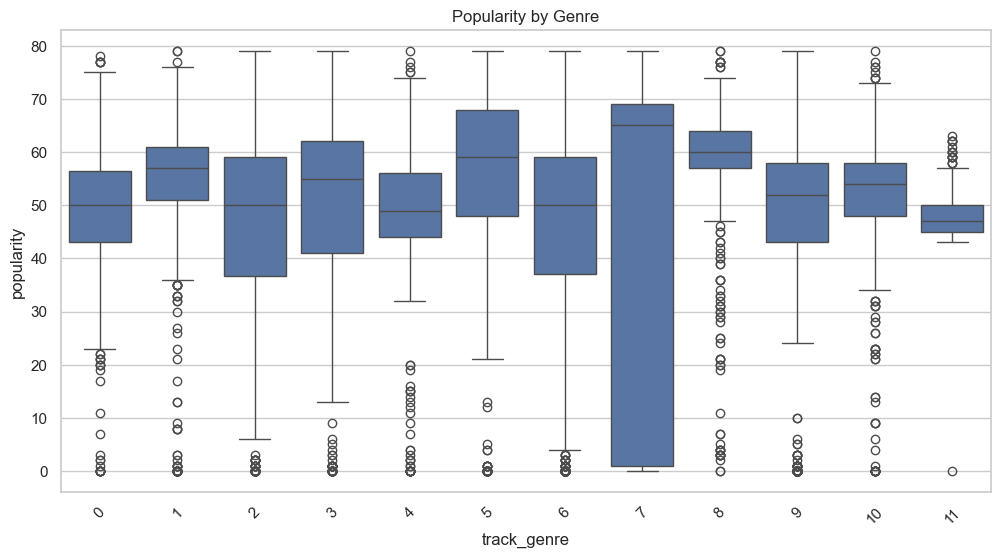

PearsonRResult(statistic=-0.008556248412592036, pvalue=0.35284282378671633)


In [200]:
# popularity vs track_genre
plt.figure(figsize=(12,6))
sns.boxplot(x='track_genre', y='popularity', data=data)
plt.title('Popularity by Genre')
plt.xticks(rotation=45)
plt.show()
corr = pearsonr(data['track_genre'], data['popularity'])
print(corr)

<h1> Independant Vs Independant (duration) </h1>

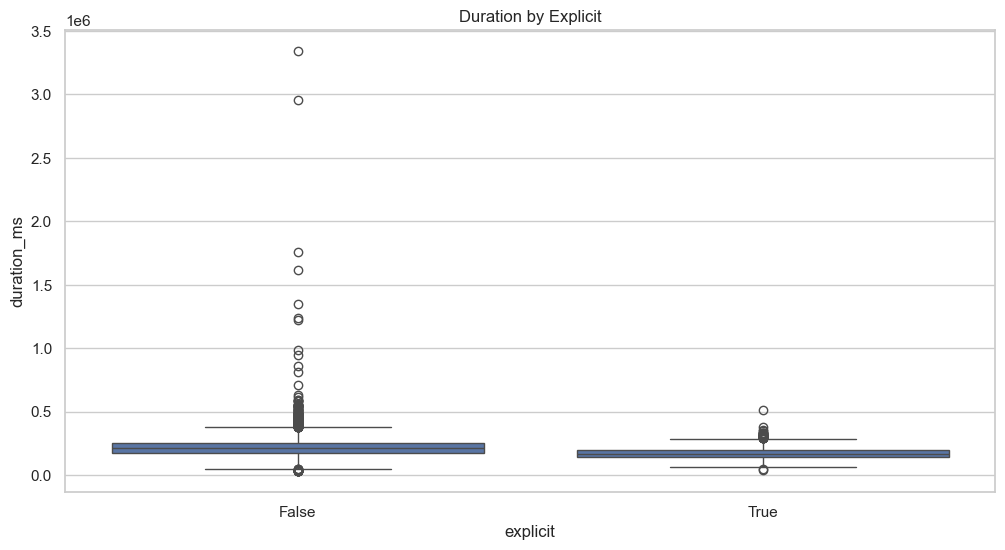

PearsonRResult(statistic=-0.18278744451990334, pvalue=3.942810980398628e-89)


In [201]:
# duration vs explicit
plt.figure(figsize=(12,6))
sns.boxplot(x='explicit', y='duration_ms', data=data)
plt.title('Duration by Explicit')
plt.show()
corr = pearsonr(data['explicit'], data['duration_ms'])
print(corr)

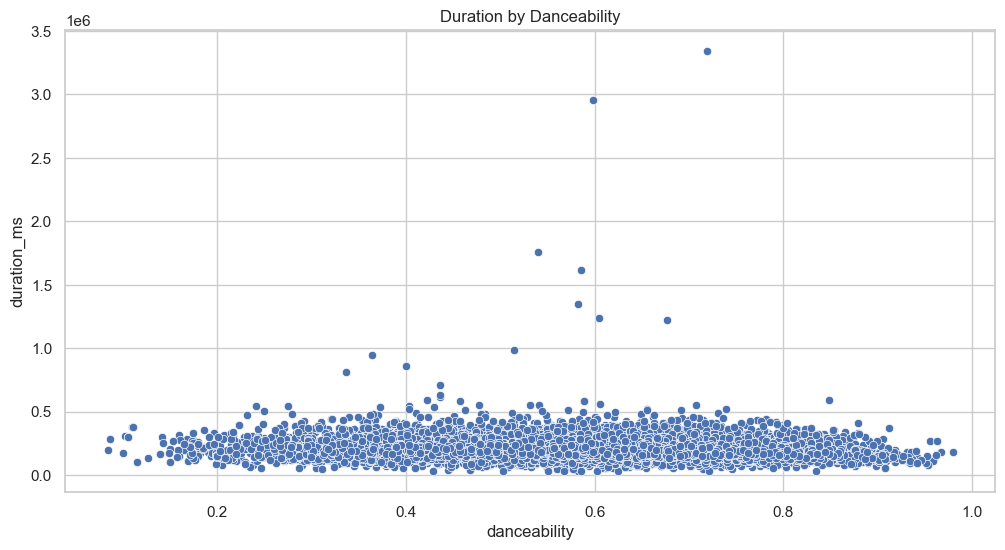

PearsonRResult(statistic=-0.16371610102834294, pvalue=1.2258213854085848e-71)


In [203]:
# duration vs danceability
plt.figure(figsize=(12,6))
sns.scatterplot(x='danceability', y='duration_ms', data=data)
plt.title('Duration by Danceability')
plt.show()
corr = pearsonr(data['danceability'], data['duration_ms'])
print(corr)

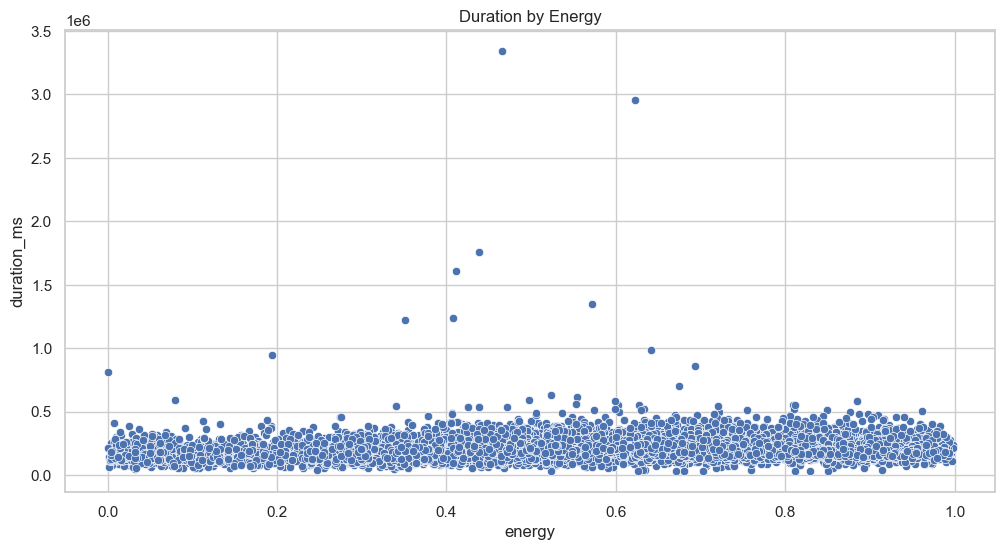

PearsonRResult(statistic=0.14224377506607205, pvalue=2.3719622646304508e-54)


In [205]:
# duration vs energy
plt.figure(figsize=(12,6))
sns.scatterplot(x='energy', y='duration_ms', data=data)
plt.title('Duration by Energy')
plt.show()
corr = pearsonr(data['energy'], data['duration_ms'])
print(corr)

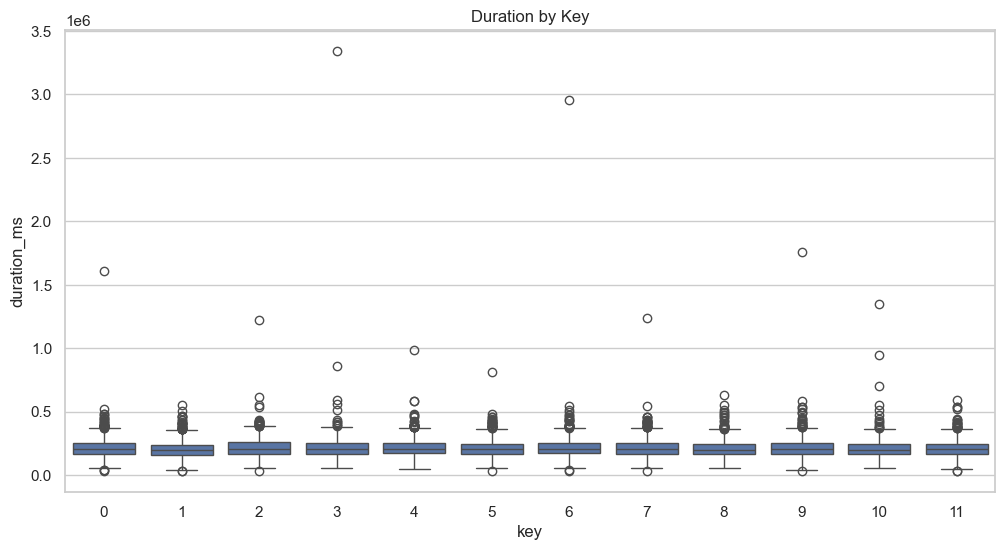

PearsonRResult(statistic=0.003921722917936987, pvalue=0.6702256993749269)


In [206]:
# duration vs key
plt.figure(figsize=(12,6))
sns.boxplot(x='key', y='duration_ms', data=data)
plt.title('Duration by Key')   
plt.show()
corr = pearsonr(data['key'], data['duration_ms'])
print(corr)


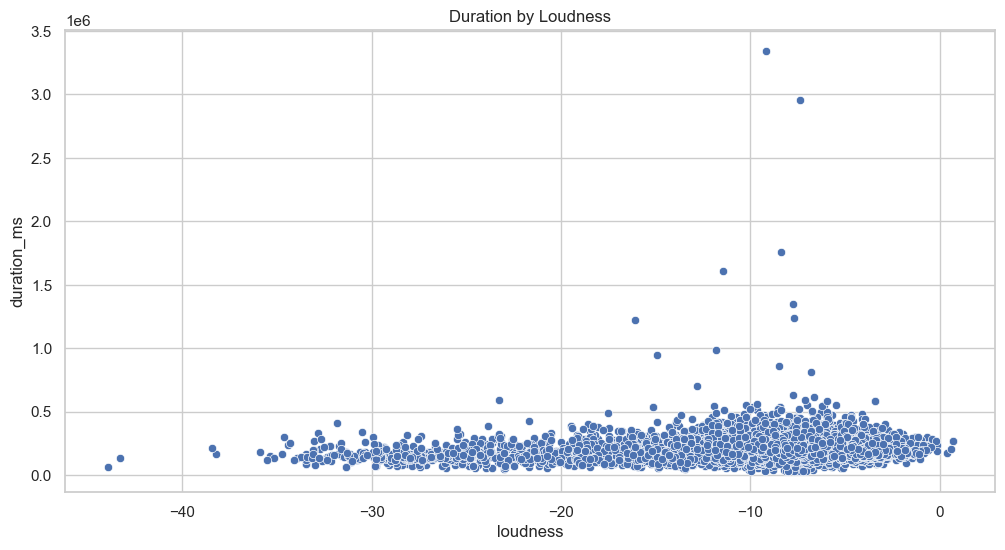

PearsonRResult(statistic=0.13625811737301494, pvalue=5.575222197313982e-50)


In [207]:
# duration vs loudness
plt.figure(figsize=(12,6))
sns.scatterplot(x='loudness', y='duration_ms', data=data)
plt.title('Duration by Loudness')
plt.show()
corr = pearsonr(data['loudness'], data['duration_ms'])
print(corr)

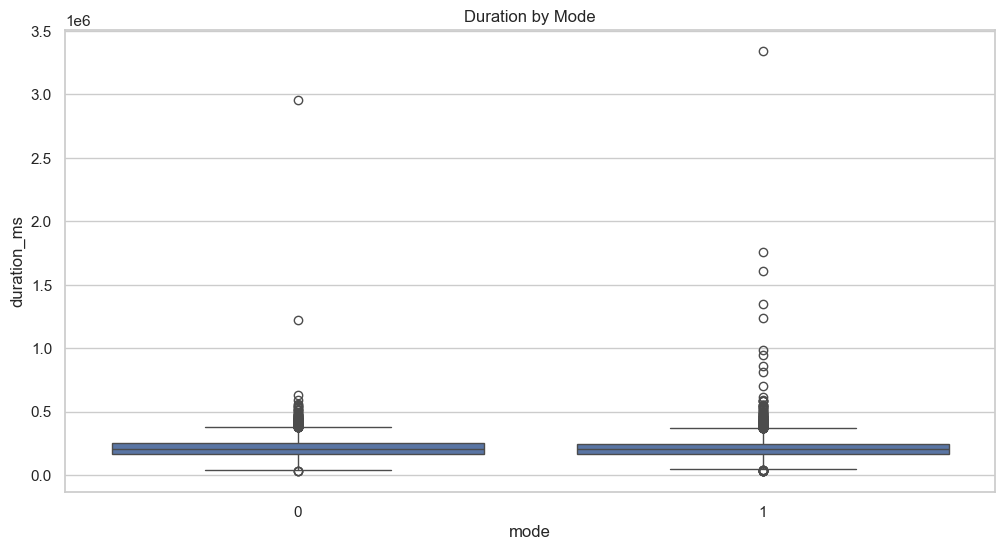

PearsonRResult(statistic=-0.0017846649037131907, pvalue=0.8463431903276173)


In [208]:
# duration vs mode
plt.figure(figsize=(12,6))
sns.boxplot(x='mode', y='duration_ms', data=data)
plt.title('Duration by Mode')
plt.show()
corr = pearsonr(data['mode'], data['duration_ms'])
print(corr)

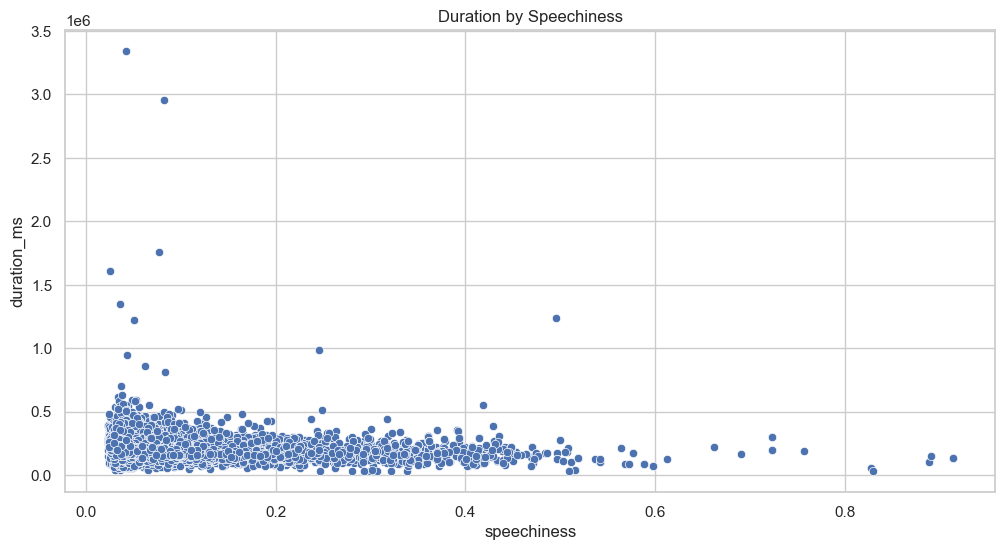

PearsonRResult(statistic=-0.15360590776674066, pvalue=3.4870710620838414e-63)


In [210]:
# duration vs speechiness 
plt.figure(figsize=(12,6))
sns.scatterplot(x='speechiness', y='duration_ms', data=data)
plt.title('Duration by Speechiness')
plt.show()
corr = pearsonr(data['speechiness'], data['duration_ms'])
print(corr)

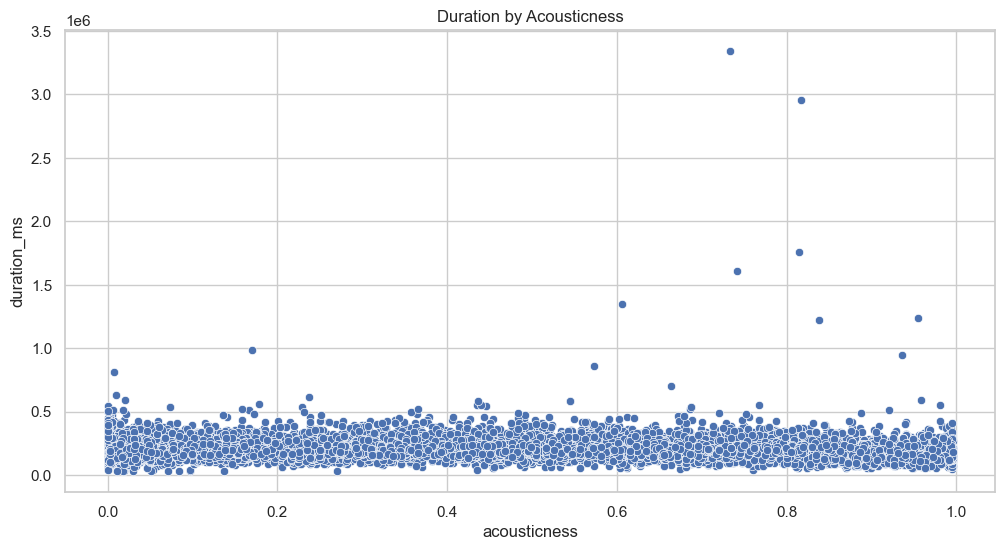

PearsonRResult(statistic=-0.06106702813572469, pvalue=3.199126380235003e-11)


In [211]:
# duration vs acousticness
plt.figure(figsize=(12,6))
sns.scatterplot(x='acousticness', y='duration_ms', data=data)
plt.title('Duration by Acousticness')
plt.show()
corr = pearsonr(data['acousticness'], data['duration_ms'])
print(corr)

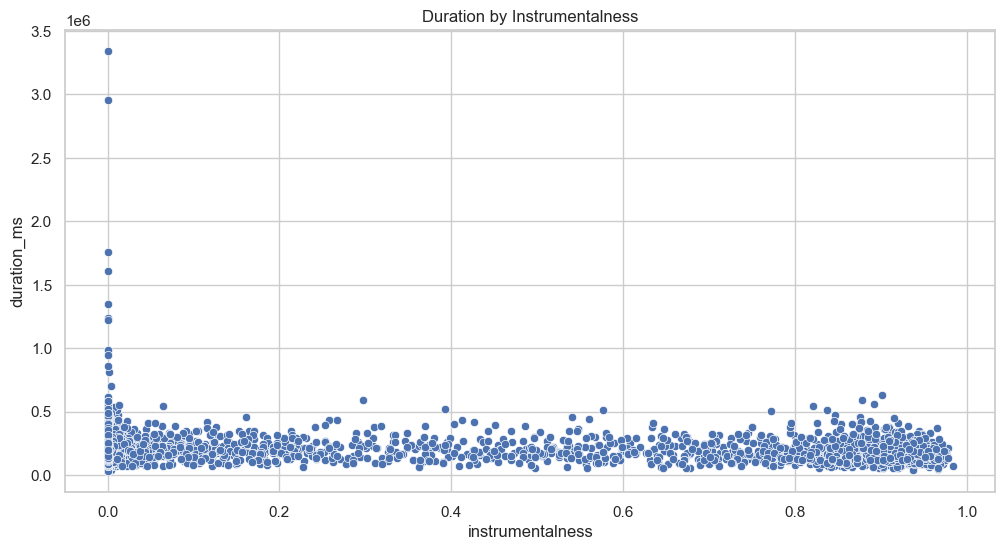

PearsonRResult(statistic=-0.14188518982435178, pvalue=4.389665886227164e-54)


In [212]:
# duration vs instrumentalness
plt.figure(figsize=(12,6))
sns.scatterplot(x='instrumentalness', y='duration_ms', data=data)
plt.title('Duration by Instrumentalness')
plt.show()
corr = pearsonr(data['instrumentalness'], data['duration_ms'])
print(corr)

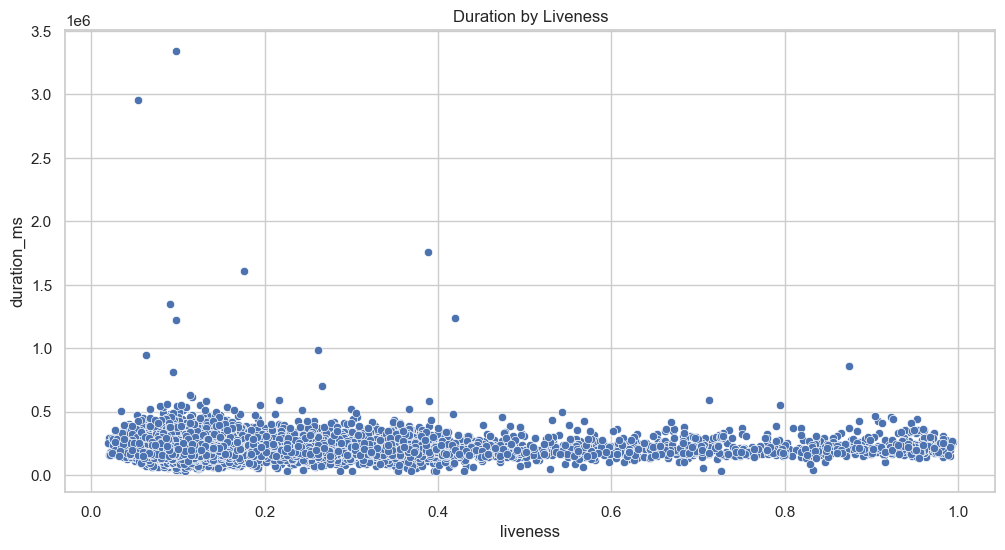

PearsonRResult(statistic=0.003787406870215145, pvalue=0.6808866453786646)


In [213]:
# duration vs liveness
plt.figure(figsize=(12,6))
sns.scatterplot(x='liveness', y='duration_ms', data=data)
plt.title('Duration by Liveness')
plt.show()
corr = pearsonr(data['liveness'], data['duration_ms'])
print(corr)


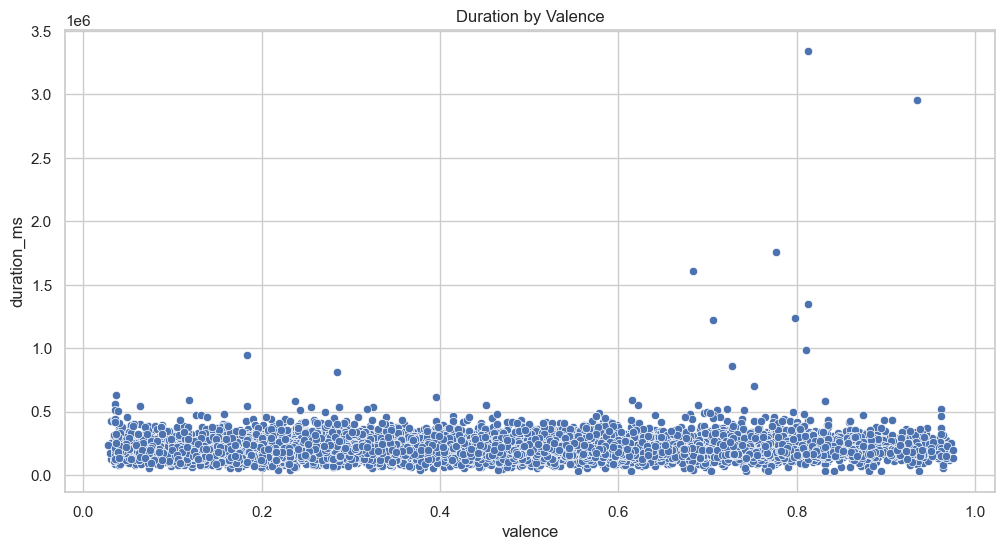

PearsonRResult(statistic=0.036088859775797816, pvalue=8.856658047186412e-05)


In [214]:
# duration vs valence
plt.figure(figsize=(12,6))
sns.scatterplot(x='valence', y='duration_ms', data=data)
plt.title('Duration by Valence')
plt.show()
corr = pearsonr(data['valence'], data['duration_ms'])
print(corr)

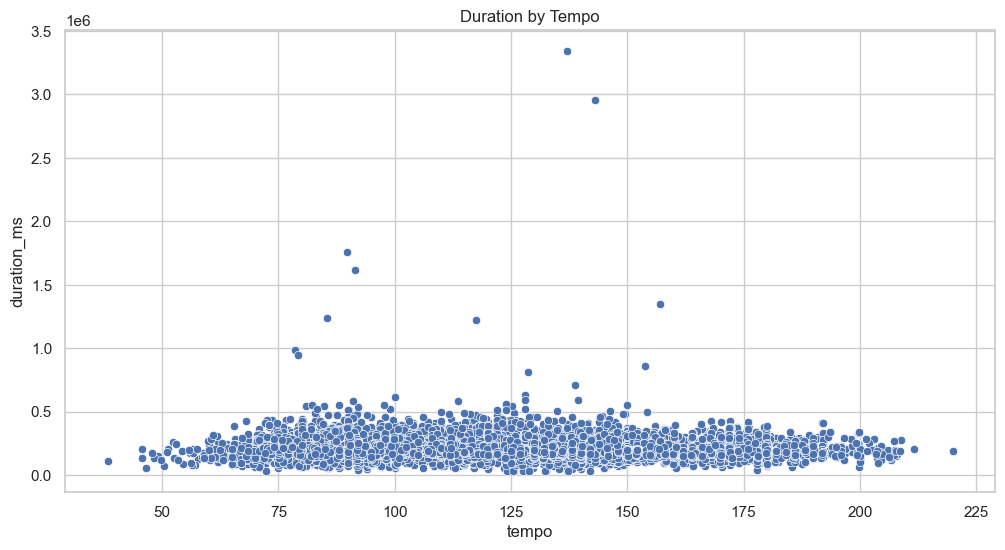

PearsonRResult(statistic=0.0023776070398340487, pvalue=0.7962752379727012)


In [215]:
# duration vs tempo
plt.figure(figsize=(12,6))
sns.scatterplot(x='tempo', y='duration_ms', data=data)
plt.title('Duration by Tempo')
plt.show()
corr = pearsonr(data['tempo'], data['duration_ms'])
print(corr)

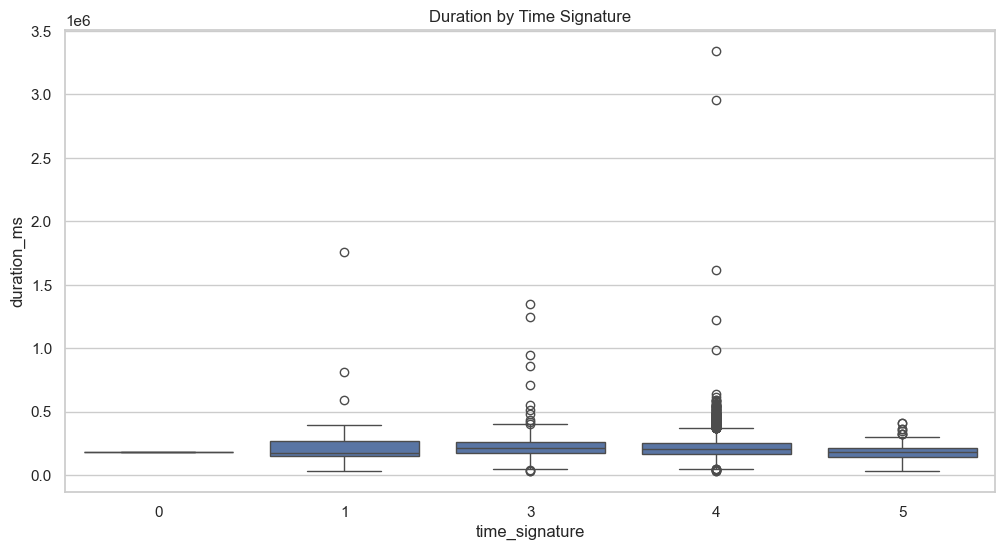

PearsonRResult(statistic=-0.04256022272620918, pvalue=3.773970432821087e-06)


In [216]:
# duration vs time_signature
plt.figure(figsize=(12,6))
sns.boxplot(x='time_signature', y='duration_ms', data=data)
plt.title('Duration by Time Signature')
plt.show()
corr = pearsonr(data['time_signature'], data['duration_ms'])
print(corr)

<h1> Independant Vs Independant (Danceability) </h1>

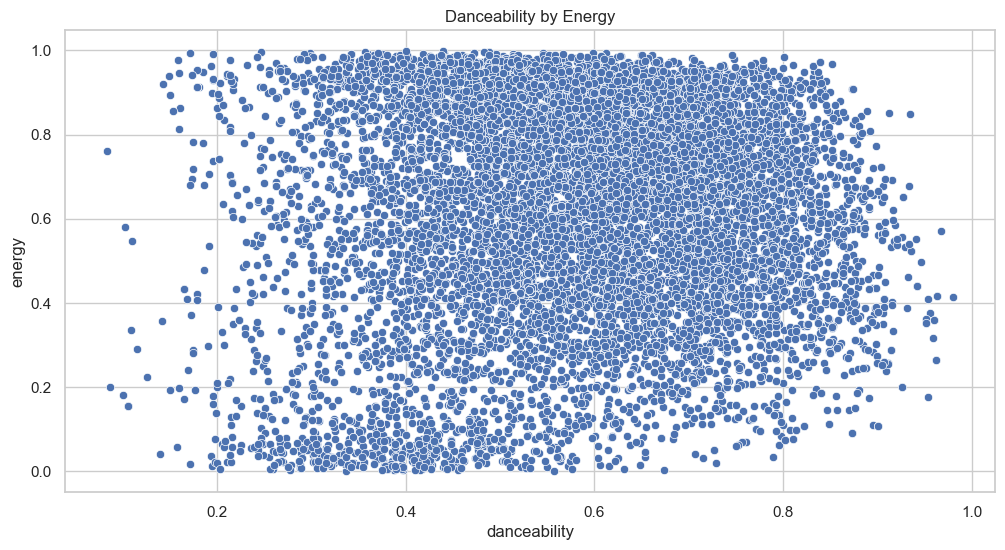

PearsonRResult(statistic=0.04917454273670034, pvalue=9.15196321974111e-08)


In [223]:
# Danceability vs energy
plt.figure(figsize=(12,6))
sns.scatterplot(x='danceability', y='energy', data=data)
plt.title('Danceability by Energy')
plt.show()
corr = pearsonr(data['danceability'], data['energy'])
print(corr)

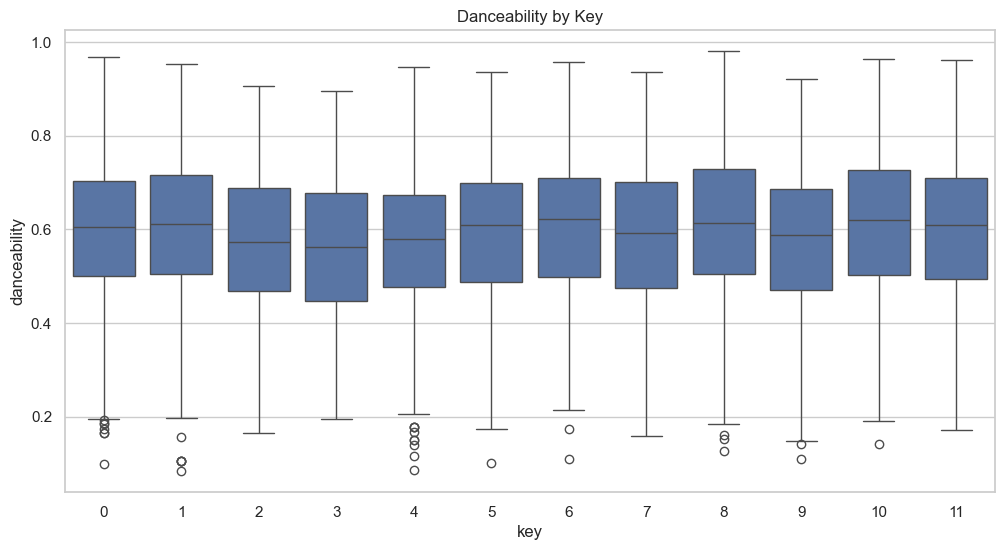

PearsonRResult(statistic=0.020633432059841562, pvalue=0.025045479948797914)


In [224]:
# Danceability vs key
plt.figure(figsize=(12,6))
sns.boxplot(x='key', y='danceability', data=data)
plt.title('Danceability by Key')
plt.show()
corr = pearsonr(data['key'], data['danceability'])
print(corr)

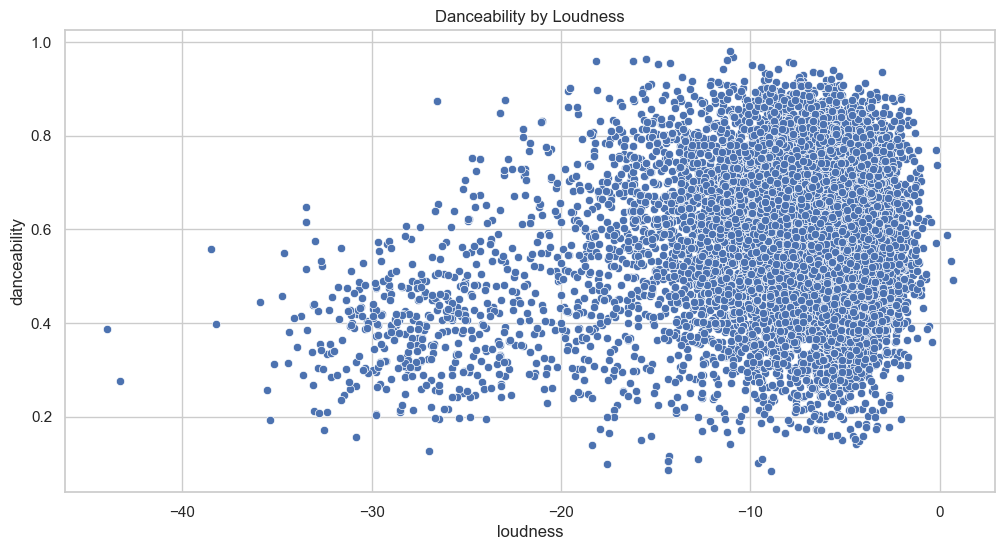

PearsonRResult(statistic=0.15418873154826268, pvalue=1.175920845378918e-63)


In [225]:
# Danceability vs loudness
plt.figure(figsize=(12,6))
sns.scatterplot(x='loudness', y='danceability', data=data)
plt.title('Danceability by Loudness')
plt.show()
corr = pearsonr(data['loudness'], data['danceability'])
print(corr)

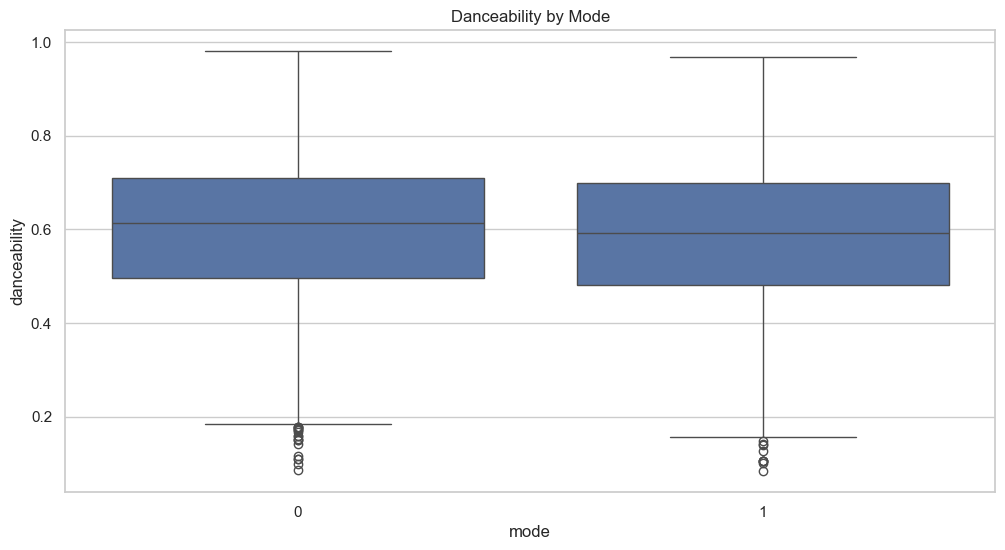

PearsonRResult(statistic=-0.05785958787535388, pvalue=3.2179485819324374e-10)


In [226]:
# Danceability vs mode
plt.figure(figsize=(12,6))
sns.boxplot(x='mode', y='danceability', data=data)
plt.title('Danceability by Mode')
plt.show()
corr = pearsonr(data['mode'], data['danceability'])
print(corr)

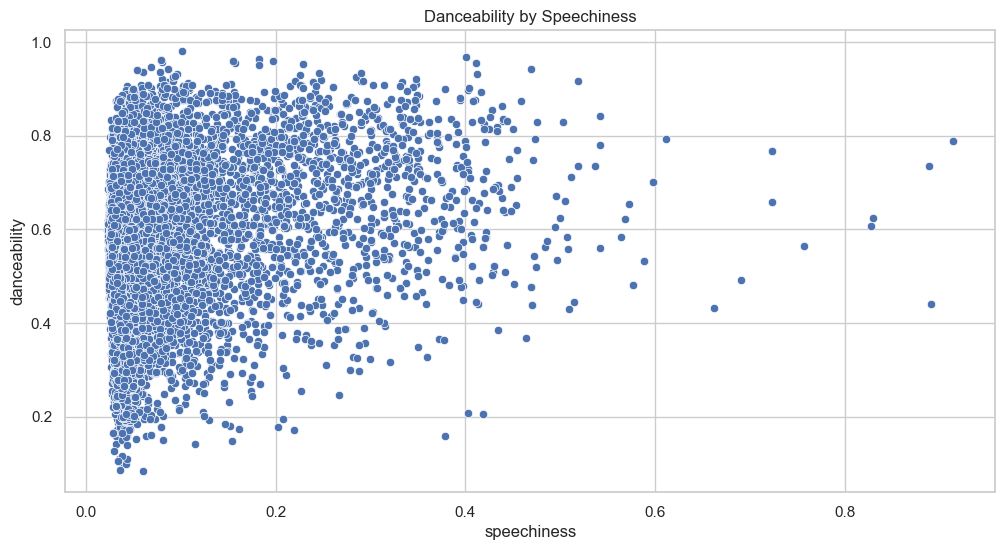

PearsonRResult(statistic=0.2070268908518857, pvalue=2.453660617180836e-114)


In [227]:
# Danceability vs speechiness
plt.figure(figsize=(12,6))
sns.scatterplot(x='speechiness', y='danceability', data=data)
plt.title('Danceability by Speechiness')
plt.show()
corr = pearsonr(data['speechiness'], data['danceability'])
print(corr)


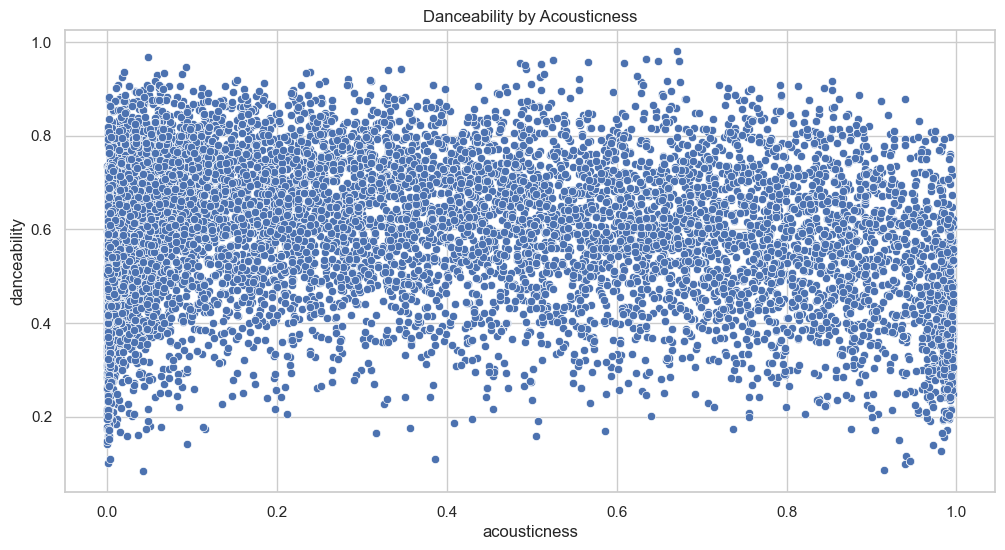

PearsonRResult(statistic=-0.10392676811849708, pvalue=1.1004597781255922e-29)


In [228]:
# Danceability vs acousticness
plt.figure(figsize=(12,6))
sns.scatterplot(x='acousticness', y='danceability', data=data)
plt.title('Danceability by Acousticness')
plt.show()
corr = pearsonr(data['acousticness'], data['danceability'])
print(corr)

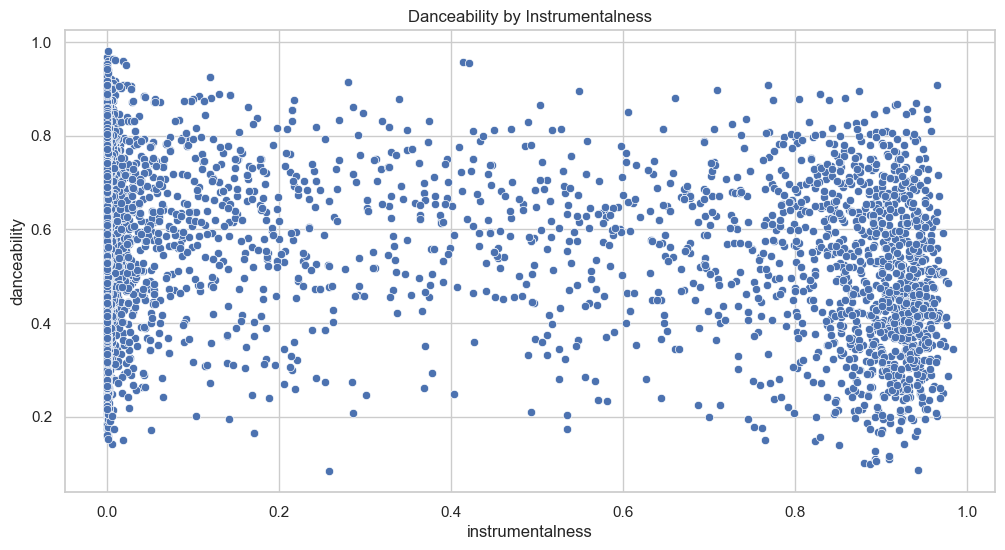

PearsonRResult(statistic=-0.19887296030813045, pvalue=1.7596716115193223e-105)


In [229]:
# danceability vs instrumentalness
plt.figure(figsize=(12,6))
sns.scatterplot(x='instrumentalness', y='danceability', data=data)
plt.title('Danceability by Instrumentalness')
plt.show()
corr = pearsonr(data['instrumentalness'], data['danceability'])
print(corr)

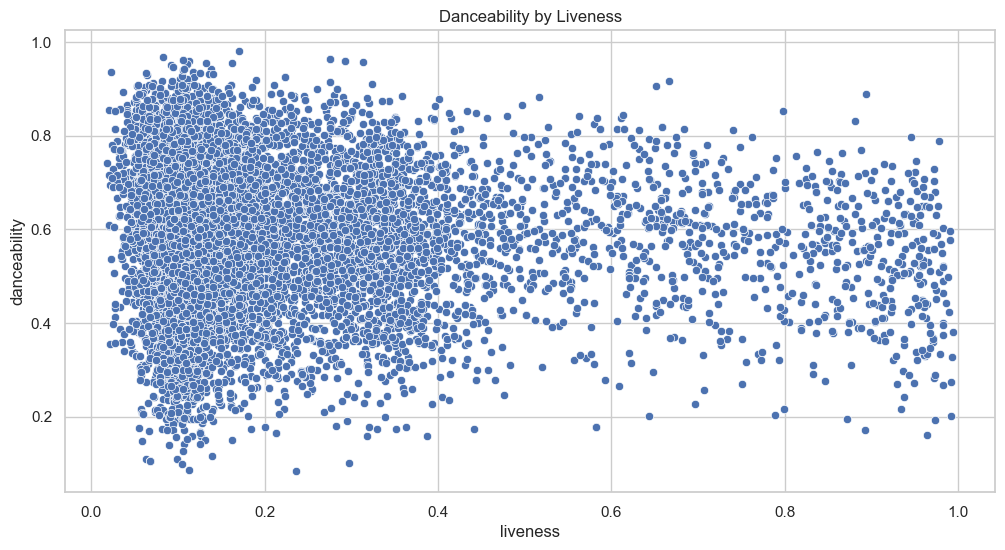

PearsonRResult(statistic=-0.07567738007738092, pvalue=1.8853095877481537e-16)


In [230]:
# Danceability vs liveness
plt.figure(figsize=(12,6))
sns.scatterplot(x='liveness', y='danceability', data=data)
plt.title('Danceability by Liveness')
plt.show()
corr = pearsonr(data['liveness'], data['danceability'])
print(corr)


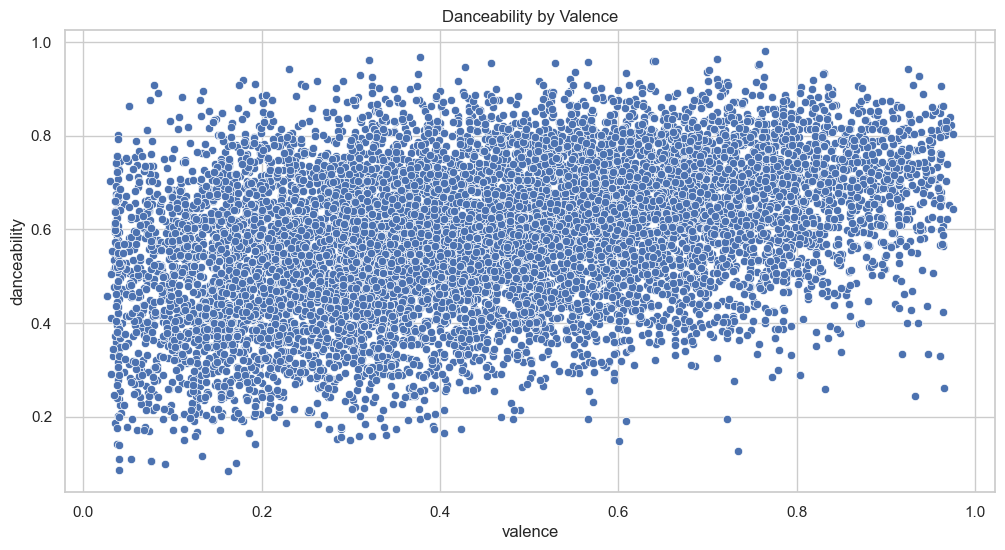

PearsonRResult(statistic=0.3712230145743306, pvalue=0.0)


In [231]:
# Danceability vs valence
plt.figure(figsize=(12,6))
sns.scatterplot(x='valence', y='danceability', data=data)
plt.title('Danceability by Valence')
plt.show()
corr = pearsonr(data['valence'], data['danceability'])
print(corr)

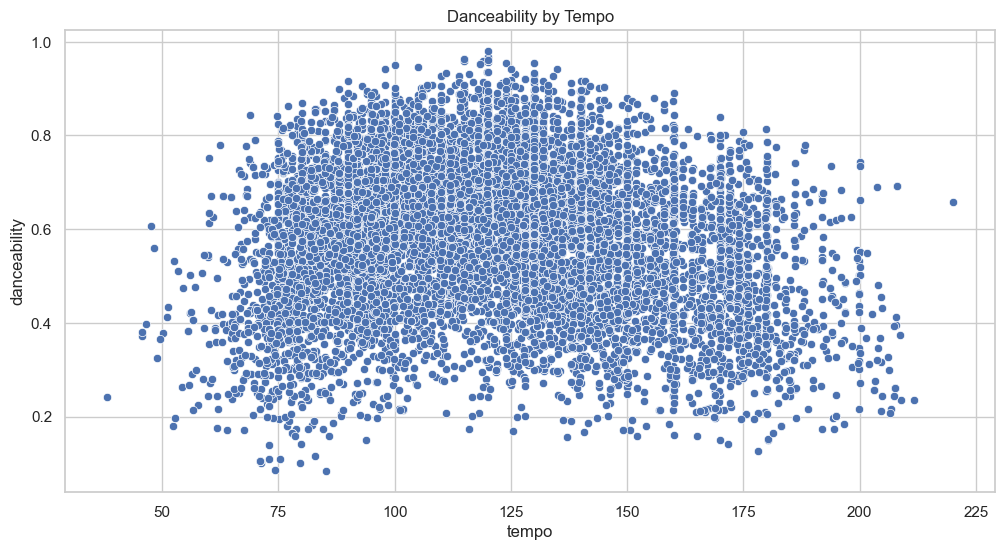

PearsonRResult(statistic=-0.10874448520194538, pvalue=2.3378612166406372e-32)


In [232]:
# Danceability vs tempo
plt.figure(figsize=(12,6))
sns.scatterplot(x='tempo', y='danceability', data=data)
plt.title('Danceability by Tempo')
plt.show()
corr = pearsonr(data['tempo'], data['danceability'])
print(corr)

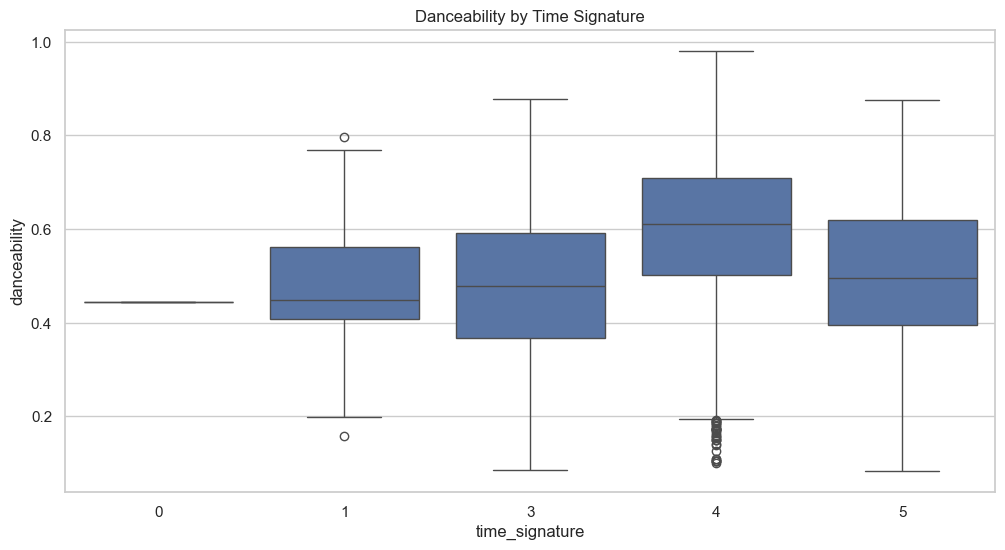

PearsonRResult(statistic=0.16978632768060103, pvalue=5.50907561821842e-77)


In [233]:
# Danceability vs time_signature
plt.figure(figsize=(12,6))
sns.boxplot(x='time_signature', y='danceability', data=data)
plt.title('Danceability by Time Signature')
plt.show()
corr = pearsonr(data['time_signature'], data['danceability'])
print(corr)

<h1> Independant Vs Independant (Energy) </h1>

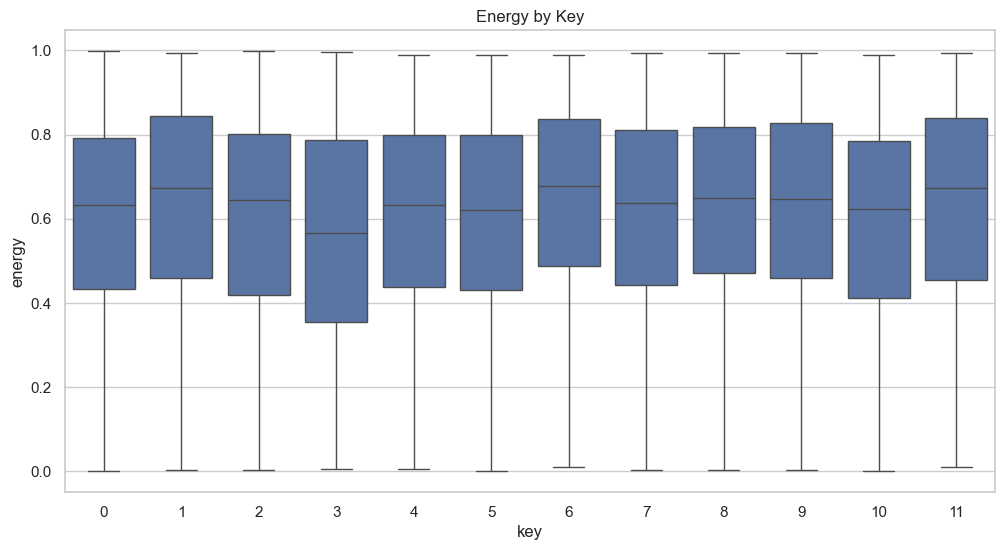

PearsonRResult(statistic=0.0209795580083544, pvalue=0.022708918127131942)


In [234]:
# Energy vs key
plt.figure(figsize=(12,6))
sns.boxplot(x='key', y='energy', data=data)
plt.title('Energy by Key')
plt.show()
corr = pearsonr(data['key'], data['energy'])
print(corr)

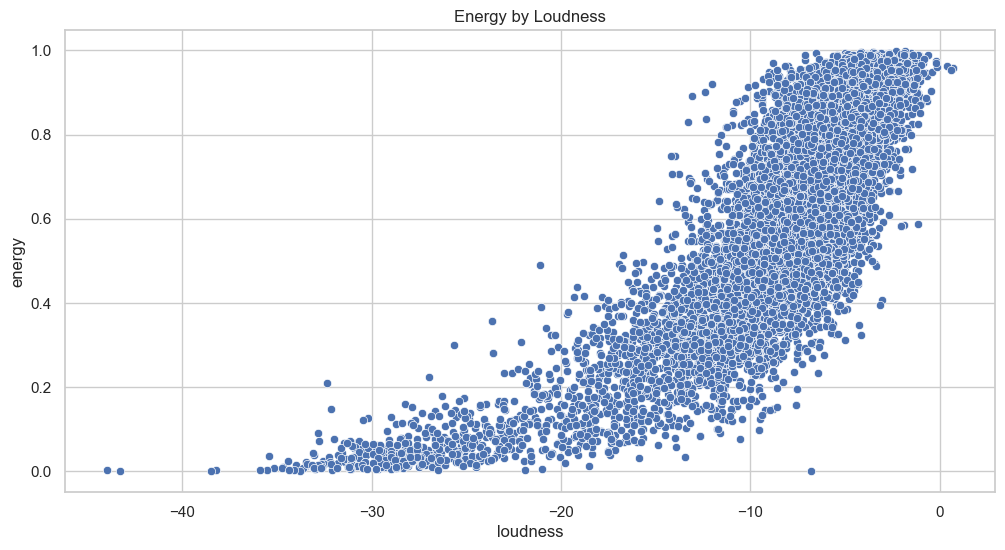

PearsonRResult(statistic=0.8143567506306809, pvalue=0.0)


In [235]:
# Energy vs loudness
plt.figure(figsize=(12,6))
sns.scatterplot(x='loudness', y='energy', data=data)
plt.title('Energy by Loudness')
plt.show()
corr = pearsonr(data['loudness'], data['energy'])
print(corr)

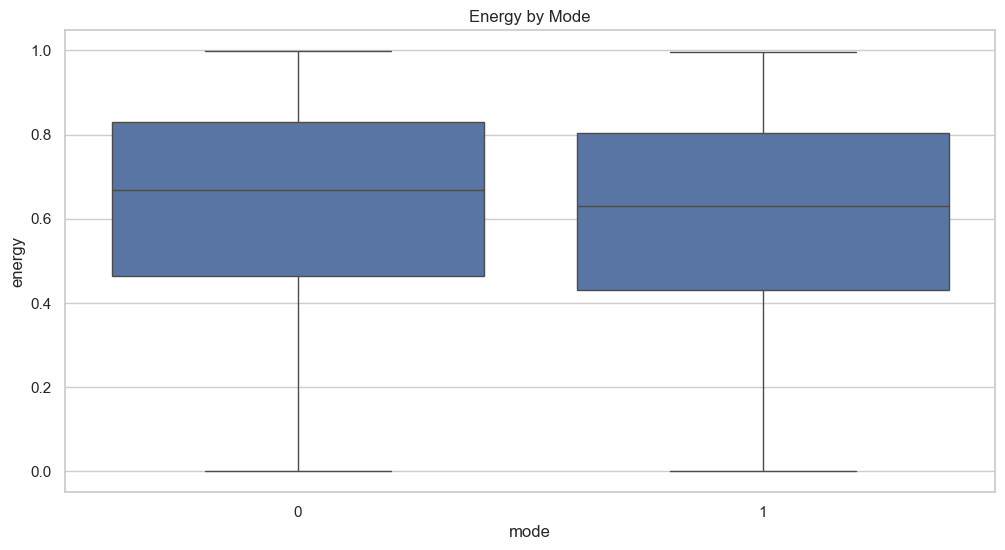

PearsonRResult(statistic=-0.0576340095885344, pvalue=3.7681401656847554e-10)


In [236]:
# Energy vs mode
plt.figure(figsize=(12,6))
sns.boxplot(x='mode', y='energy', data=data)
plt.title('Energy by Mode')
plt.show()
corr = pearsonr(data['mode'], data['energy'])
print(corr)

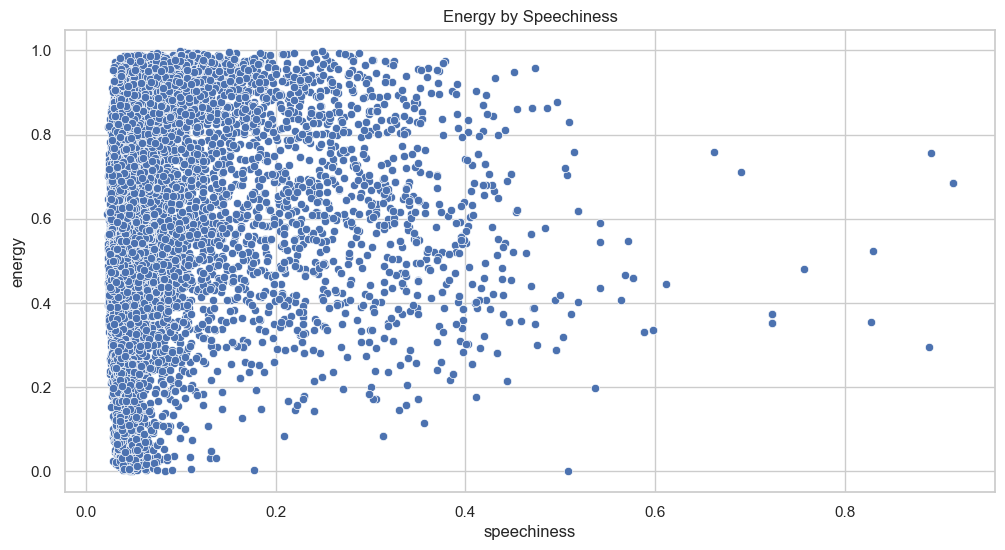

PearsonRResult(statistic=0.08589606352281617, pvalue=9.257172858326883e-21)


In [237]:
# Energy vs speechiness
plt.figure(figsize=(12,6))
sns.scatterplot(x='speechiness', y='energy', data=data)
plt.title('Energy by Speechiness')
plt.show()
corr = pearsonr(data['speechiness'], data['energy'])
print(corr)

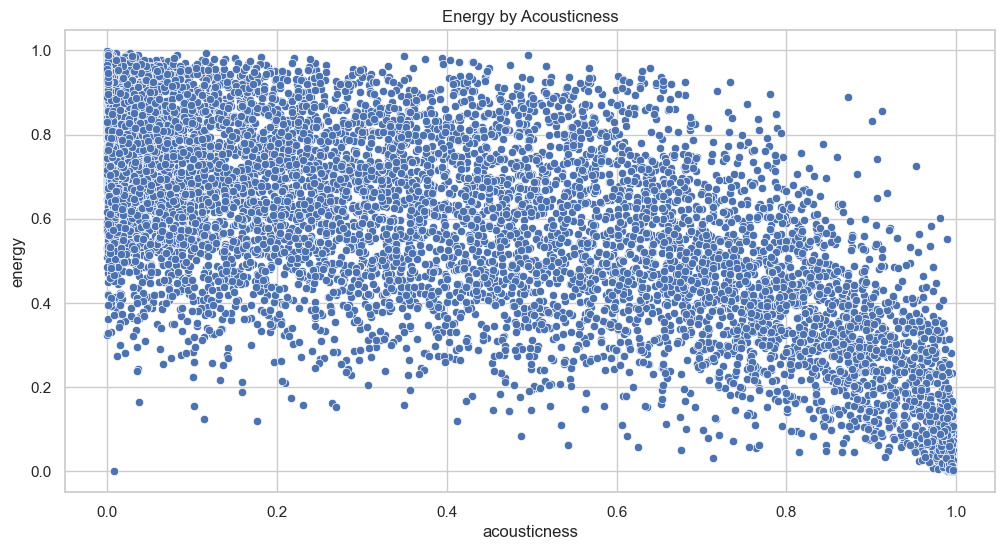

PearsonRResult(statistic=-0.739608730931318, pvalue=0.0)


In [238]:
# Energy vs acousticness
plt.figure(figsize=(12,6))
sns.scatterplot(x='acousticness', y='energy', data=data)
plt.title('Energy by Acousticness')
plt.show()
corr = pearsonr(data['acousticness'], data['energy'])
print(corr)

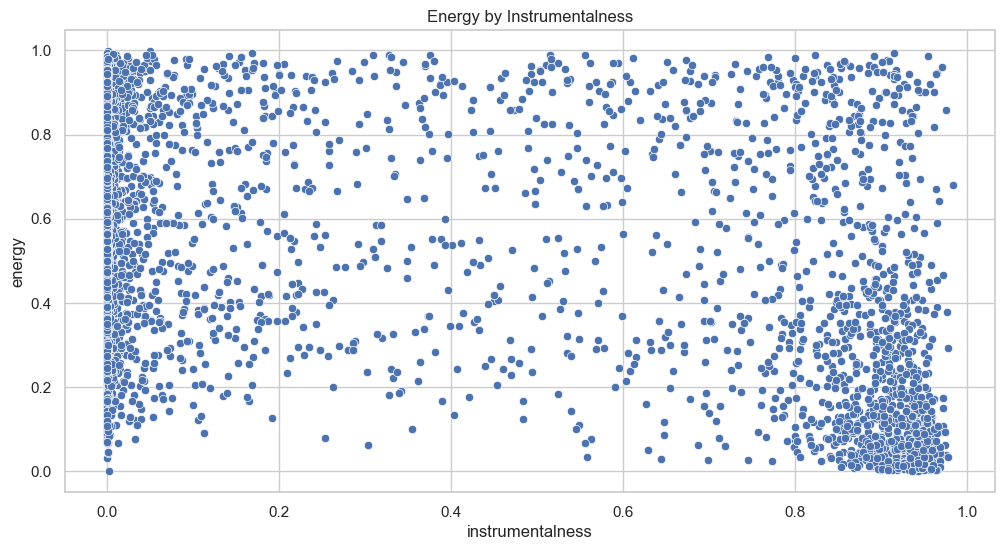

PearsonRResult(statistic=-0.4340385258500488, pvalue=0.0)


In [239]:
# Energy vs instrumentalness
plt.figure(figsize=(12,6))
sns.scatterplot(x='instrumentalness', y='energy', data=data)
plt.title('Energy by Instrumentalness')
plt.show()
corr = pearsonr(data['instrumentalness'], data['energy'])
print(corr)

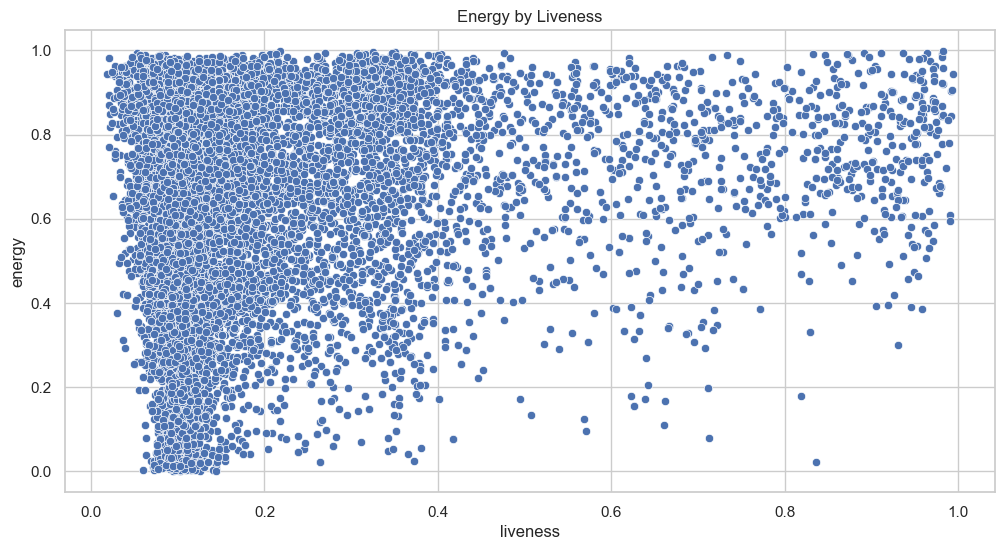

PearsonRResult(statistic=0.2189888440476926, pvalue=4.979238232182994e-128)


In [240]:
# Energy vs liveness
plt.figure(figsize=(12,6))
sns.scatterplot(x='liveness', y='energy', data=data)
plt.title('Energy by Liveness')
plt.show()
corr = pearsonr(data['liveness'], data['energy'])
print(corr)

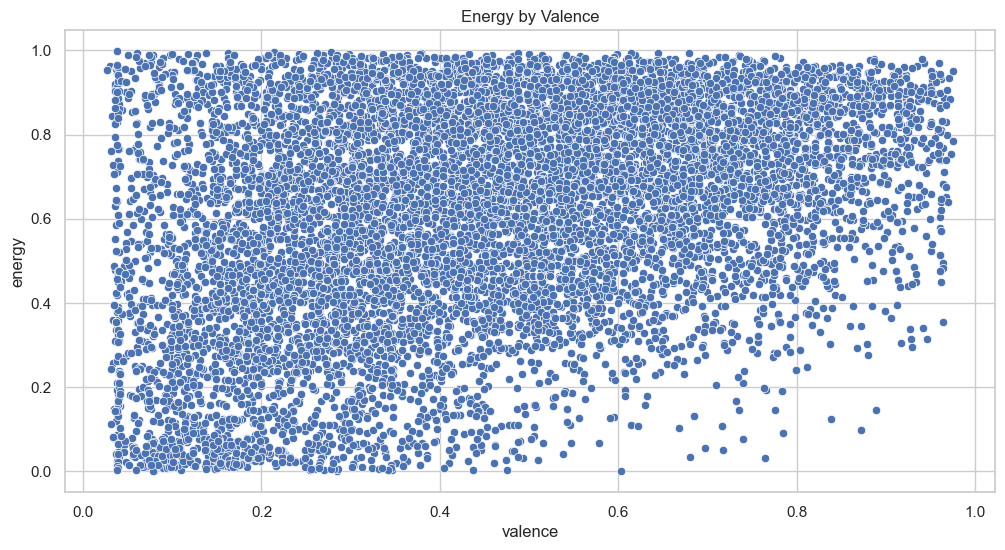

PearsonRResult(statistic=0.3658251425846466, pvalue=0.0)


In [241]:
# Energy vs valence
plt.figure(figsize=(12,6))
sns.scatterplot(x='valence', y='energy', data=data)
plt.title('Energy by Valence')
plt.show()
corr = pearsonr(data['valence'], data['energy'])
print(corr)

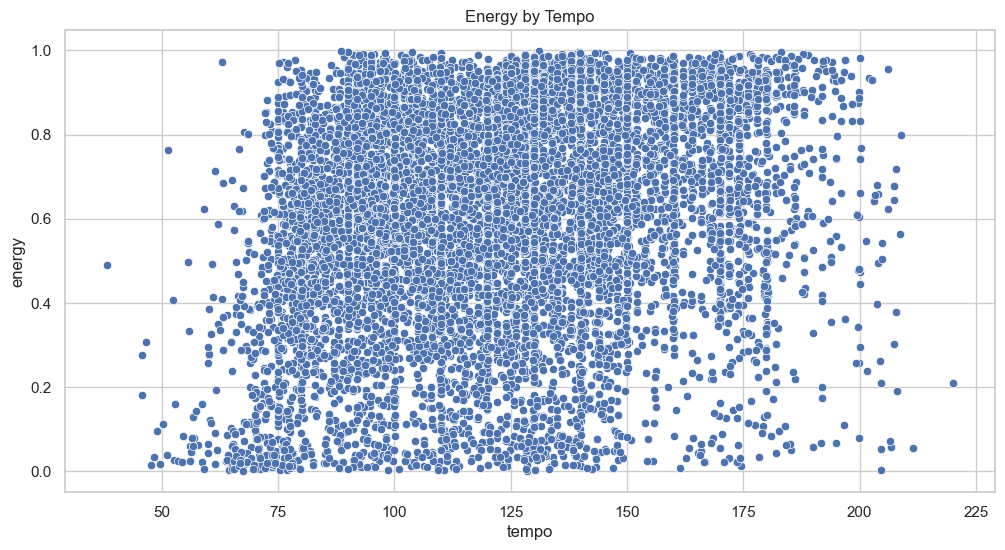

PearsonRResult(statistic=0.21366222374242497, pvalue=7.909129995547487e-122)


In [242]:
# Energy vs tempo
plt.figure(figsize=(12,6))  
sns.scatterplot(x='tempo', y='energy', data=data)
plt.title('Energy by Tempo')
plt.show()
corr = pearsonr(data['tempo'], data['energy'])
print(corr)

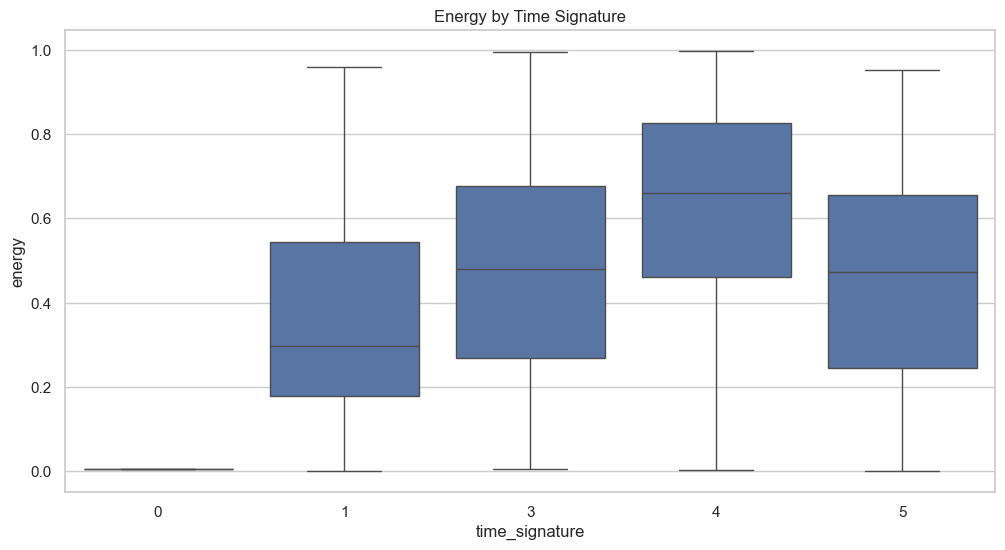

PearsonRResult(statistic=0.16311366434141927, pvalue=4.054849102475187e-71)


In [243]:
# Energy vs time_signature
plt.figure(figsize=(12,6))
sns.boxplot(x='time_signature', y='energy', data=data)
plt.title('Energy by Time Signature')
plt.show()
corr = pearsonr(data['time_signature'], data['energy'])
print(corr)

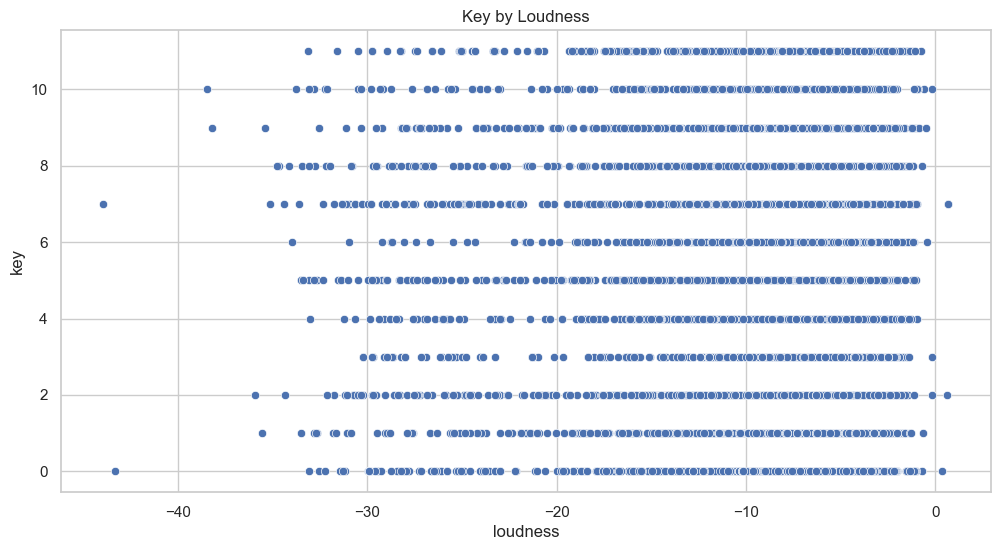

PearsonRResult(statistic=0.006144919820397529, pvalue=0.5046145684174428)


In [244]:
# Key vs loudness
plt.figure(figsize=(12,6))
sns.scatterplot(x='loudness', y='key', data=data)
plt.title('Key by Loudness')
plt.show()
corr = pearsonr(data['loudness'], data['key'])
print(corr)

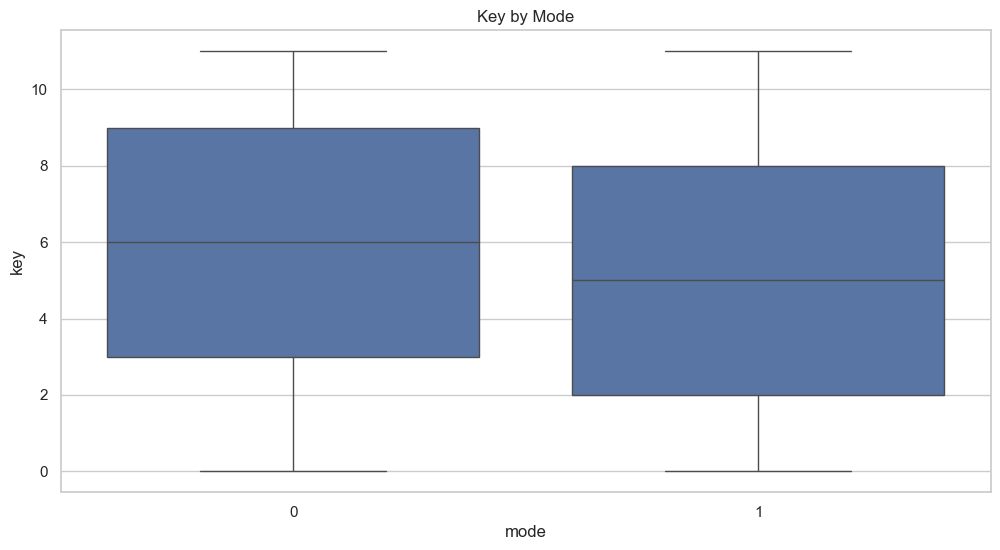

PearsonRResult(statistic=-0.09200034813623789, pvalue=1.3635567769941282e-23)


In [245]:
# Key vs mode
plt.figure(figsize=(12,6))
sns.boxplot(x='mode', y='key', data=data)
plt.title('Key by Mode')
plt.show()
corr = pearsonr(data['mode'], data['key'])
print(corr)

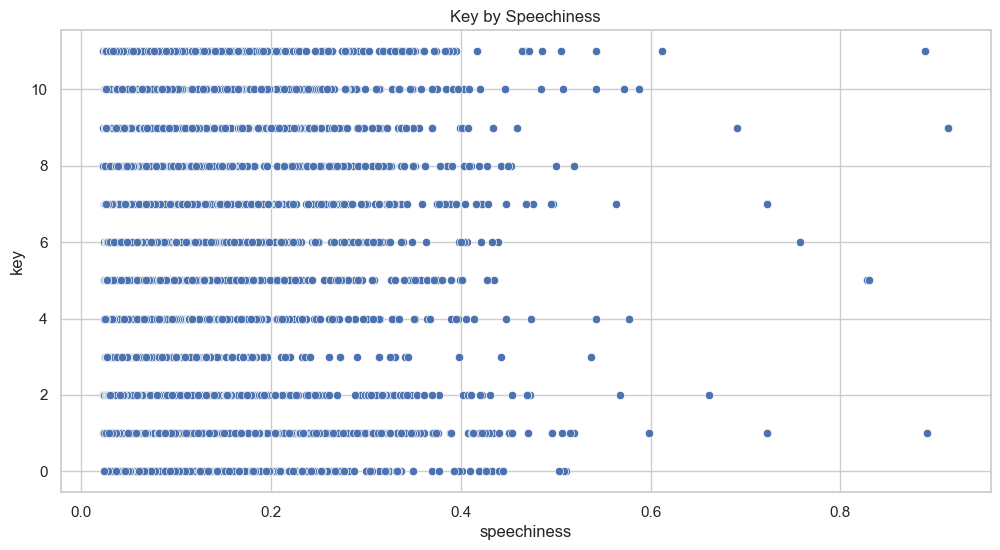

PearsonRResult(statistic=0.019454562405164716, pvalue=0.034630267535146954)


In [246]:
# Key vs speechiness
plt.figure(figsize=(12,6))
sns.scatterplot(x='speechiness', y='key', data=data)
plt.title('Key by Speechiness')
plt.show()
corr = pearsonr(data['speechiness'], data['key'])
print(corr)

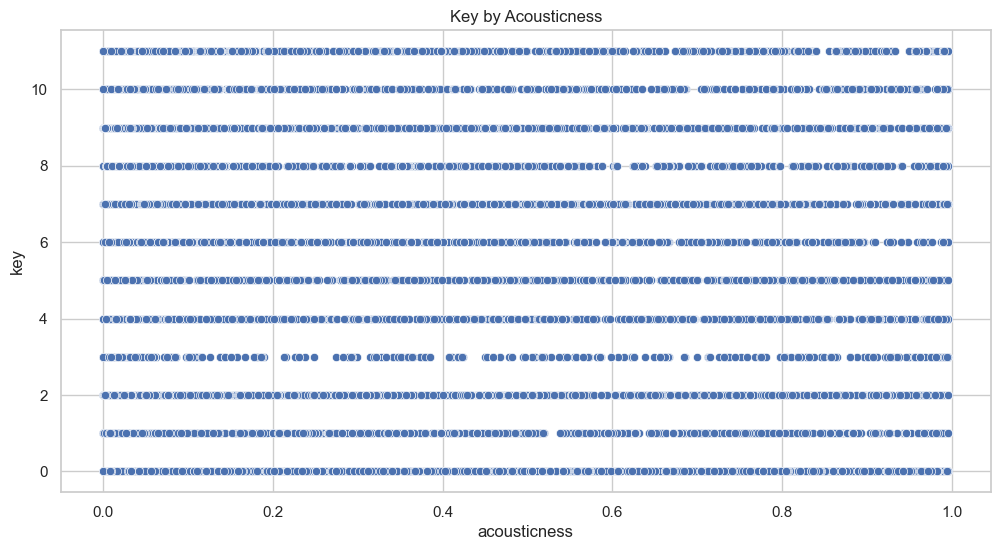

PearsonRResult(statistic=-0.010828655648849269, pvalue=0.23965323847762102)


In [247]:
# Key vs acousticness
plt.figure(figsize=(12,6))
sns.scatterplot(x='acousticness', y='key', data=data)
plt.title('Key by Acousticness')
plt.show()
corr = pearsonr(data['acousticness'], data['key'])
print(corr)

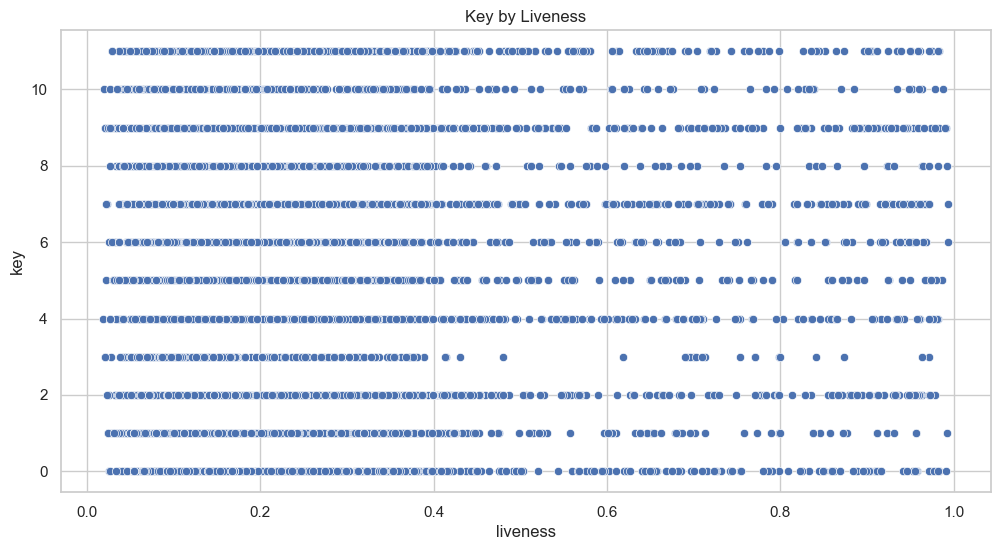

PearsonRResult(statistic=0.01219313133726125, pvalue=0.1854934046784469)


In [249]:
# key vs liveness 
plt.figure(figsize=(12,6))
sns.scatterplot(x='liveness', y='key', data=data)
plt.title('Key by Liveness')
plt.show()
corr = pearsonr(data['liveness'], data['key'])
print(corr)

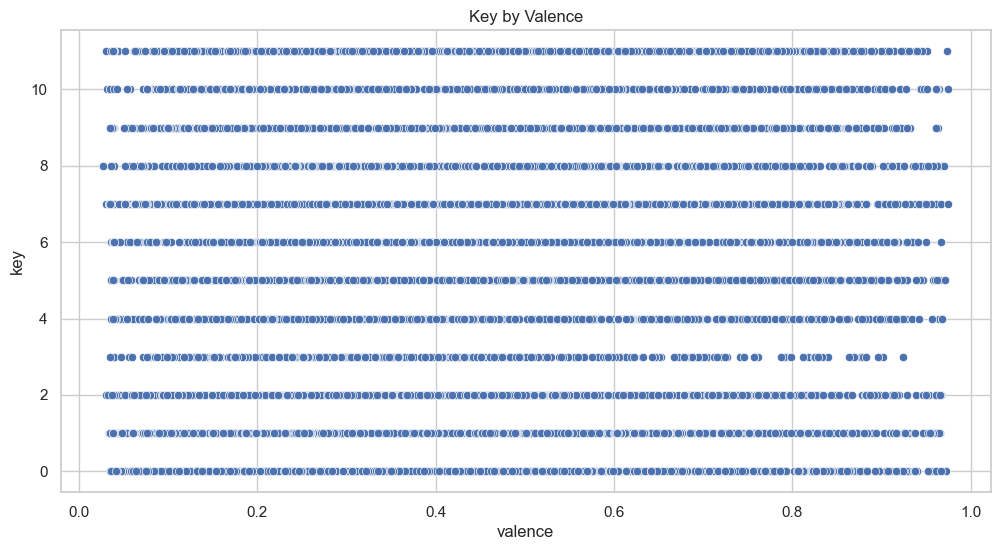

PearsonRResult(statistic=0.03954134134123238, pvalue=1.7450489593696673e-05)


In [250]:
# Key vs valence
plt.figure(figsize=(12,6))
sns.scatterplot(x='valence', y='key', data=data)
plt.title('Key by Valence')
plt.show()
corr = pearsonr(data['valence'], data['key'])
print(corr)

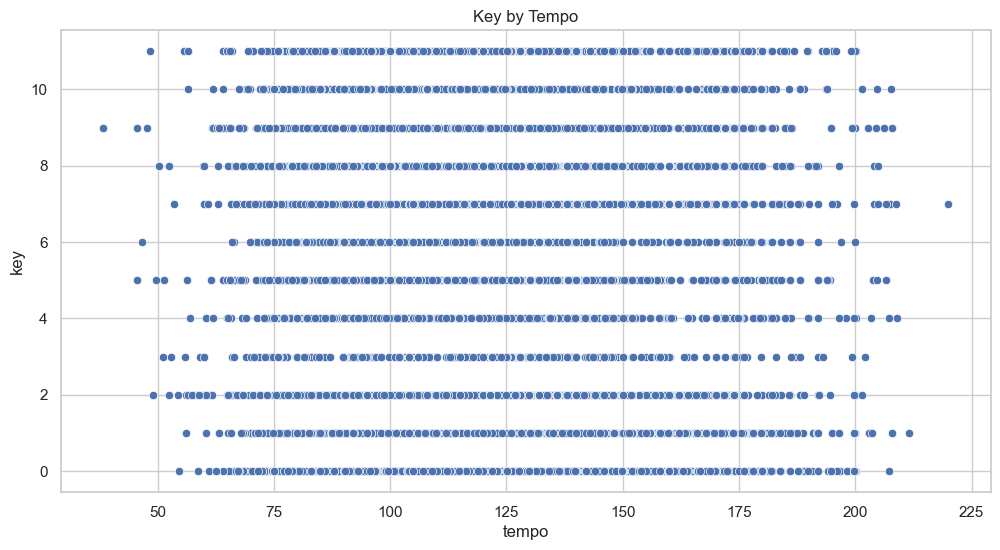

PearsonRResult(statistic=0.0007482691021995396, pvalue=0.9352430451450879)


In [251]:
# Key vs tempo
plt.figure(figsize=(12,6))
sns.scatterplot(x='tempo', y='key', data=data)
plt.title('Key by Tempo')
plt.show()
corr = pearsonr(data['tempo'], data['key'])
print(corr)

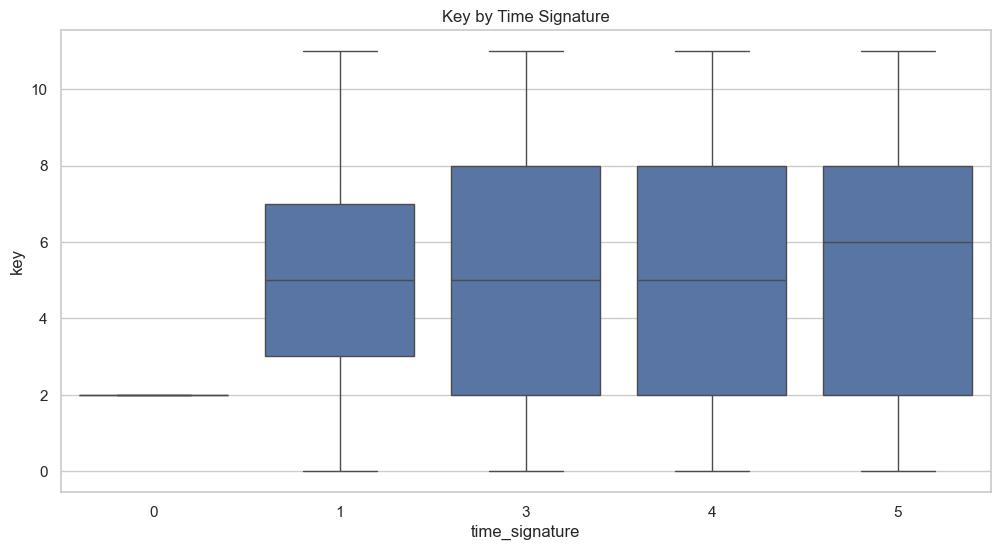

PearsonRResult(statistic=0.0035703198259504016, pvalue=0.6982520519594121)


In [252]:
# Key vs time_signature
plt.figure(figsize=(12,6))
sns.boxplot(x='time_signature', y='key', data=data)
plt.title('Key by Time Signature')
plt.show()
corr = pearsonr(data['time_signature'], data['key'])
print(corr)

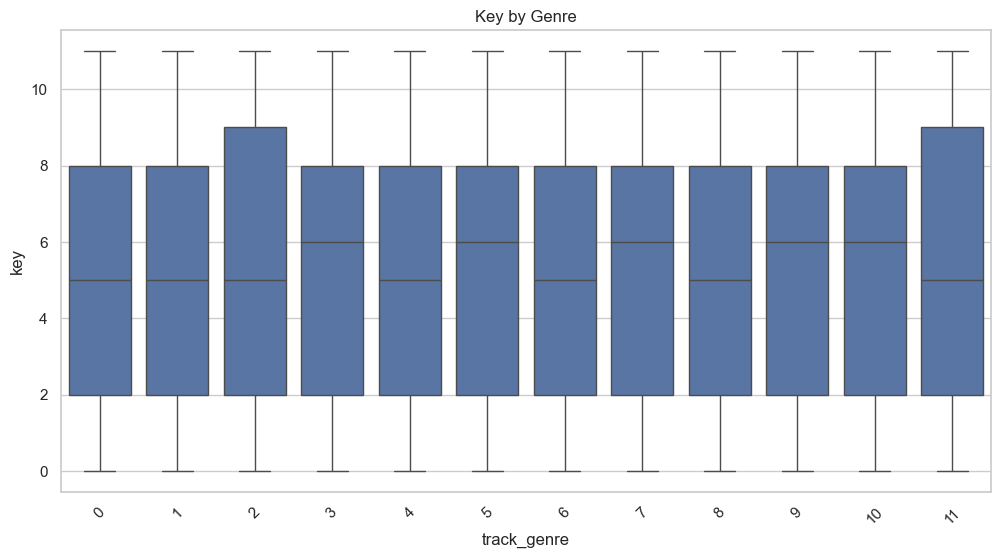

PearsonRResult(statistic=0.007459758763248524, pvalue=0.41792740027987074)


In [253]:
# key Vs track genre
plt.figure(figsize=(12,6))
sns.boxplot(x='track_genre', y='key', data=data)
plt.title('Key by Genre')
plt.xticks(rotation=45)
plt.show()
corr = pearsonr(data['track_genre'], data['key'])
print(corr)

<h1> Independant Vs Independant (Loudness) </h1>

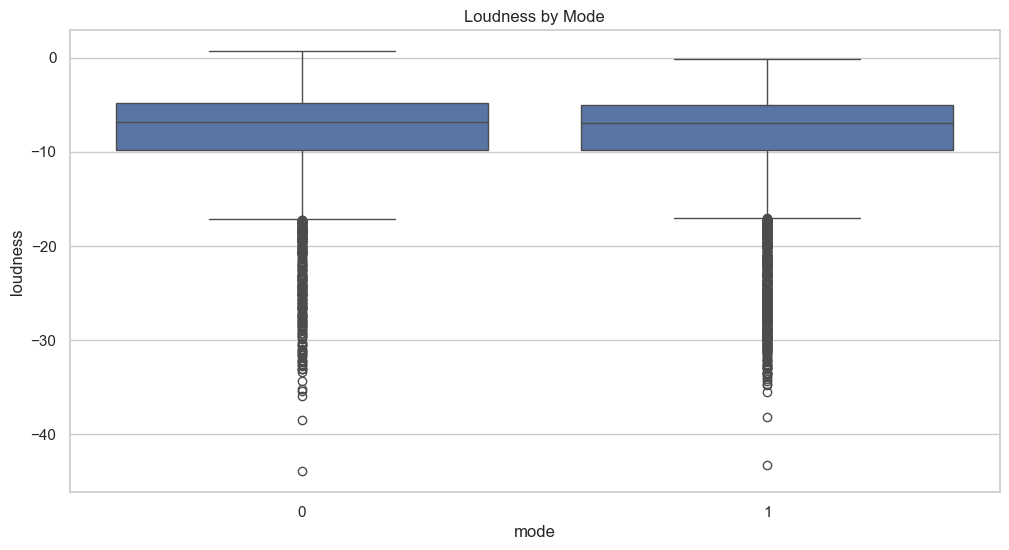

PearsonRResult(statistic=-0.019483138350159523, pvalue=0.03436528922109383)


In [254]:
# Loudness vs mode
plt.figure(figsize=(12,6))
sns.boxplot(x='mode', y='loudness', data=data)
plt.title('Loudness by Mode')
plt.show()
corr = pearsonr(data['mode'], data['loudness'])
print(corr)

<h1>----------------</h1>

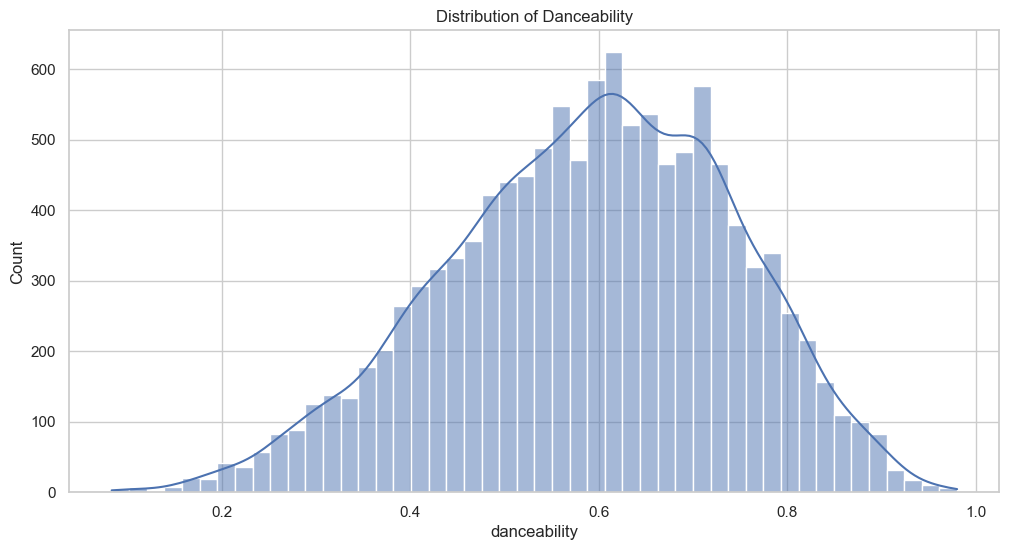

In [184]:
# Histogram of danceability
plt.figure(figsize=(12,6))
sns.histplot(data['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.show()

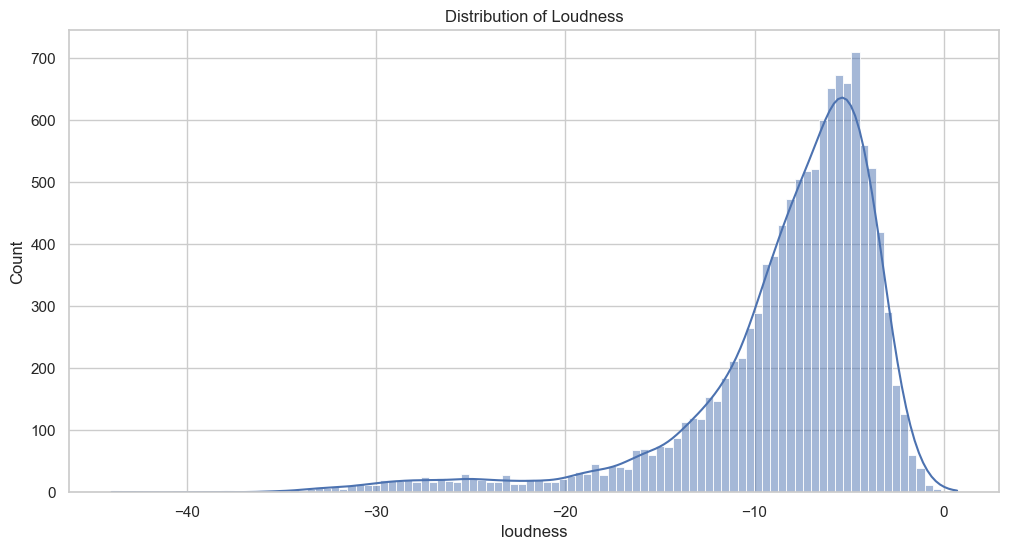

In [185]:
#Histogram of Loudness
plt.figure(figsize=(12,6))
sns.histplot(data['loudness'], kde=True)
plt.title('Distribution of Loudness')
plt.show()

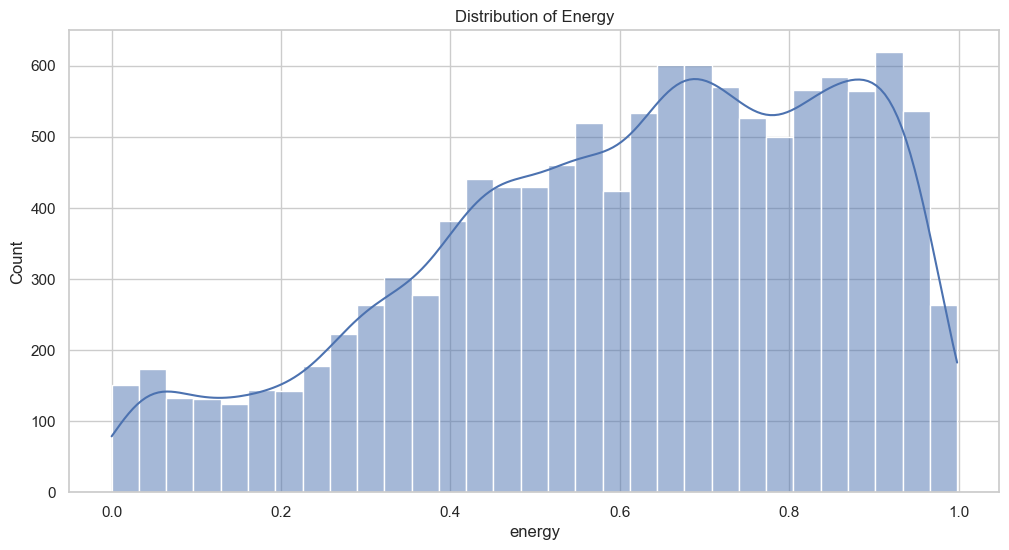

In [186]:
# Histogram of Energy
plt.figure(figsize=(12,6))
sns.histplot(data['energy'], kde=True)
plt.title('Distribution of Energy')
plt.show()